# Capstone Project: English Premier League Predictions


# Part 1B -  FIFA & Season Fixtures Clean Up

In this notebook, we will be cleaning up the datasets and ready them for feature engineering and EDA at the next notebook. We will be extracting teams data from FIFA datasets. For the season fixtures, we will be sorting them by teams as well. We will be editing some simple errors in the datasets as well. 

Team datas will be extracted based on teams that will be playing in each season and also based on first 18 players which have the most appearances, then will be tallying them to each season fixtures as well. 18 players is due to because starting 11 players and 7 players on bench for every match.

We will be doing data analysis on the FIFA datasets as well.

### Contents:
- [Cleaning Up the Datasets](#Cleaning-Up-the-Datasets)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

In [1]:
#import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from radar_chart.radar_chart import radar_chart
from math import pi

pd.set_option('max_rows',None)
pd.set_option('max_columns',None)

## Cleaning Up the Datasets


### Season 2017/2018 & FIFA 18 Stats Clean Up

Below section will be for the 2017/2018 season and FIFA 18

In [2]:
bpl2018= pd.read_csv('data/epl2018/epl2018.csv')
fifa18 = pd.read_csv("data/fifastats/players_18.csv")

In [3]:
#As usual, Ronaldo and Messi being in the top two slots
fifa18.head(10)

sofifa_id                                         player_url  \
0      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
1     158023  https://sofifa.com/player/158023/lionel-messi/...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     167495  https://sofifa.com/player/167495/manuel-neuer/...   
4     176580  https://sofifa.com/player/176580/luis-suarez/1...   
5     188545  https://sofifa.com/player/188545/robert-lewand...   
6     193080  https://sofifa.com/player/193080/david-de-gea-...   
7     183277  https://sofifa.com/player/183277/eden-hazard/1...   
8     155862  https://sofifa.com/player/155862/sergio-ramos-...   
9     167664  https://sofifa.com/player/167664/gonzalo-higua...   

          short_name                            long_name  age         dob  \
0  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   32  1985-02-05   
1           L. Messi       Lionel Andrés Messi Cuccittini   30  1987-06-24   
2             Neymar        Neymar da Silva Santos Júnior   25  1992-02-05   
3           M. Neuer                         Manuel Neuer   31  1986-03-27   
4          L. Suárez             Luis Alberto Suárez Díaz   30  1987-01-24   
5     R. Lewandowski                   Robert Lewandowski   28  1988-08-21   
6             De Gea                David De Gea Quintana   26  1990-11-07   
7          E. Hazard                          Eden Hazard   26  1991-01-07   
8       Sergio Ramos                  Sergio Ramos García   31  1986-03-30   
9         G. Higuaín              Gonzalo Gerardo Higuaín   29  1987-12-10   

   height_cm  weight_kg nationality            club_name  \
0        185         80    Portugal          Real Madrid   
1        170         72   Argentina         FC Barcelona   
2        175         68      Brazil  Paris Saint-Germain   
3        193         92     Germany    FC Bayern München   
4        182         86     Uruguay         FC Barcelona   
5        185         79      Poland    FC Bayern München   
6        193         76       Spain    Manchester United   
7        173         76     Belgium              Chelsea   
8        183         75       Spain          Real Madrid   
9        184         87   Argentina             Juventus   

              league_name  league_rank  overall  potential  value_eur  \
0  Spain Primera Division          1.0       94         94   95500000   
1  Spain Primera Division          1.0       93         93  105000000   
2          French Ligue 1          1.0       92         94  123000000   
3    German 1. Bundesliga          1.0       92         92   61000000   
4  Spain Primera Division          1.0       92         92   97000000   
5    German 1. Bundesliga          1.0       91         91   92000000   
6  English Premier League          1.0       90         92   64500000   
7  English Premier League          1.0       90         91   90500000   
8  Spain Primera Division          1.0       90         90   52000000   
9         Italian Serie A          1.0       90         90   77000000   

   wage_eur player_positions preferred_foot  international_reputation  \
0    575000           LW, ST          Right                         5   
1    575000               RW           Left                         5   
2    275000               LW          Right                         5   
3    225000               GK          Right                         5   
4    500000               ST          Right                         5   
5    350000               ST          Right                         4   
6    200000               GK          Right                         4   
7    300000               LW          Right                         4   
8    300000               CB          Right                         4   
9    275000               ST          Right                         4   

   weak_foot  skill_moves      work_rate   body_type real_face  \
0          4            5       High/Low  C. Ronaldo       Yes   
1    

In [4]:
fifa18.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       236
league_name                     236
league_rank                     236
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1480
player_tags                   16458
team_position                   236
team_jersey_number          

In [5]:
#Players with null values are players without their club record inside. It can be due to licensing issue that the game do not have the club. However, they appear on the national team level. Therefore, there are still data on them.
fifa18.loc[fifa18['club_name'] == 'Arsenal']

sofifa_id                                         player_url  \
18        184941  https://sofifa.com/player/184941/alexis-sanche...   
27        176635  https://sofifa.com/player/176635/mesut-ozil/18...   
54         48940   https://sofifa.com/player/48940/petr-cech/180002   
74        193301  https://sofifa.com/player/193301/alexandre-lac...   
106       192227  https://sofifa.com/player/192227/shkodran-must...   
115       165229  https://sofifa.com/player/165229/laurent-kosci...   
167       146562  https://sofifa.com/player/146562/santiago-cazo...   
222       199503  https://sofifa.com/player/199503/granit-xhaka/...   
238       186561  https://sofifa.com/player/186561/aaron-ramsey/...   
271       178509  https://sofifa.com/player/178509/olivier-girou...   
301       203747  https://sofifa.com/player/203747/hector-beller...   
326       189461  https://sofifa.com/player/189461/jack-wilshere...   
358        53612  https://sofifa.com/player/53612/per-mertesacke...   
428       207993  https://sofifa.com/player/207993/sead-kolasina...   
437       186146  https://sofifa.com/player/186146/danny-welbeck...   
474       164859  https://sofifa.com/player/164859/theo-walcott/...   
498       177604  https://sofifa.com/player/177604/ignacio-monre...   
608       189271  https://sofifa.com/player/189271/francis-coque...   
655       176550  https://sofifa.com/player/176550/david-ospina/...   
1002      211454  https://sofifa.com/player/211454/mohamed-elnen...   
1104      158626  https://sofifa.com/player/158626/mathieu-debuc...   
1600      205989  https://sofifa.com/player/205989/calum-chamber...   
2046      213655  https://sofifa.com/player/213655/alex-iwobi/18...   
3301      228295  https://sofifa.com/player/228295/rob-holding/1...   
9893      225782  https://sofifa.com/player/225782/ainsley-maitl...   
9959      216699  https://sofifa.com/player/216699/gedion-zelale...   
11001     213418  https://sofifa.com/player/213418/chuba-akpom/1...   
11943     228509  https://sofifa.com/player/228509/jeff-reine-ad...   
12228     224129  https://sofifa.com/player/224129/tafari-moore/...   
12896     224763  https://sofifa.com/player/224763/krystian-biel...   
15015     231448  https://sofifa.com/player/231448/reiss-nelson/...   
15019     236988  https://sofifa.com/player/236988/edward-nketia...   
15132     233441  https://sofifa.com/player/233441/tolaji-bola/1...   

              short_name                         long_name  age         dob  \
18            A. Sánchez  Alexis Alejandro Sánchez Sánchez   28  1988-12-19   
27               M. Özil                        Mesut Özil   28  1988-10-15   
54               P. Čech                         Petr Čech   35  1982-05-20   
74          A. Lacazette               Alexandre Lacazette   26  1991-05-28   
106           S. Mustafi                  Shkodran Mustafi   25  1992-04-17   
115         L. Koscielny                 Laurent Koscielny   31  1985-09-10   
167        Santi Cazorla         Santiago Cazorla González   32  1984-12-13   
222             G. Xhaka                      Granit Xhaka   24  1992-09-27   
238            A. Ramsey                      Aaron Ramsey   26  1990-12-26   
271            O. Giroud                    Olivier Giroud   30  1986-09-30   
301      Héctor Bellerín            Héctor Bellerín Moruno   22  1995-03-19   
326          J. Wilshere                     Jack Wilshere   25  1992-01-01   
358       P. Mertesacker                   Per Mertesacker   32  1984-09-29   
428         S. Kolašinac                    Sead Kolašinac   24  1993-06-20   
437           D. Welbeck  Daniel Nii Tackie Mensah Welbeck   26  1990-11-26   
474           T. Walcott                      Theo Walcott   28  1989-03-16   
498        Nacho Monreal             Ignacio Monreal Eraso   31  1986-02-26   
608          F. Coquelin                  Francis Coquelin   26  1991-05-13   
655            D. Ospina              David Ospina Ramírez   28  1988-08-31   
1002        

In [6]:
fifa18.drop(columns = ['sofifa_id','player_url','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','real_face','body_type','player_tags','team_position','loaned_from','joined','contract_valid_until',
 'nation_position','nation_jersey_number','player_traits','release_clause_eur','gk_positioning','gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes'],inplace=True)

In [7]:
bpl_2018_teams = ['Arsenal','Bournemouth','Brighton & Hove Albion','Burnley','Chelsea','Crystal Palace',
           'Everton','Huddersfield Town','Leicester City','Liverpool','Manchester United','Manchester City','Newcastle United',
            'Stoke City','Swansea City','Southampton','Tottenham Hotspur','West Ham United','Watford','West Bromwich Albion']

In [8]:
fifa18bplteams = fifa18.loc[fifa18['club_name'].isin(bpl_2018_teams)]

In [9]:
fifa18bplteams.isnull().sum()

short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club_name                       0
league_name                     0
league_rank                     0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
team_jersey_number              0
pace                           73
shooting                       73
passing                        73
dribbling                      73
defending                      73
physic                         73
gk_speed                      584
attacking_crossing              0
attacking_fini

In [10]:
bpl2018['Home'].unique()

array(['Arsenal', 'Bournemouth', 'Brighton &amp; Hove Albion', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Huddersfield Town',
       'Leicester City', 'Liverpool', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Southampton',
       'Stoke City', 'Swansea City', 'Tottenham Hotspur', 'Watford',
       'West Bromwich Albion', 'West Ham United'], dtype=object)

In [11]:
bpl2018.head(50)

Player     #   Nation       Pos     Age    Min  Gls  Ast  PK  \
0   Alexandre Lacazette   9.0   fr FRA        FW  26-104   75.0    1    0   0   
1        Olivier Giroud  12.0   fr FRA        FW  30-344   15.0    0    0   0   
2         Danny Welbeck  23.0  eng ENG        AM  26-287   75.0    2    1   0   
3        Alexis Sánchez   7.0   cl CHI        AM  28-264   15.0    0    0   0   
4            Mesut Özil  11.0   de GER        AM  28-329   90.0    0    0   0   
5        Sead Kolašinac  31.0   ba BIH        LM  24-081   90.0    0    1   0   
6       Héctor Bellerín  24.0   es ESP        RM  22-174   90.0    0    0   0   
7          Granit Xhaka  29.0   ch SUI        DM  24-347   90.0    0    0   0   
8          Aaron Ramsey   8.0  wal WAL        DM  26-257   67.0    0    1   0   
9      Francis Coquelin  34.0   fr FRA        DM  26-119   14.0    0    0   0   
10        Nacho Monreal  18.0   es ESP        CB  31-195   90.0    0    0   0   
11     Shkodran Mustafi  20.0   de GER        CB  25-145   90.0    0    0   0   
12    Laurent Koscielny   6.0   fr FRA        CB  31-364   90.0    0    0   0   
13            Petr Čech  33.0   cz CZE        GK  35-112   90.0    0    0   0   
14           14 Players   NaN      NaN       NaN     NaN  981.0    3    3   0   
15        Jermain Defoe  18.0  eng ENG        FW  34-337   71.0    0    0   0   
16          Lys Mousset  31.0   fr FRA        FW  21-213   19.0    0    0   0   
17          Joshua King  17.0   no NOR     AM,FW  25-237   90.0    0    0   0   
18          Ryan Fraser  24.0  sco SCO        CM  23-197   38.0    0    0   0   
19           Jordon Ibe  33.0  eng ENG        AM  21-275   52.0    0    0   0   
20          Harry Arter   8.0   ie IRL  DM,AM,CM  27-255   90.0    0    0   0   
21          Dan Gosling   4.0  eng ENG     CM,DM  27-220   90.0    0    0   0   
22      Charlie Daniels  11.0  eng ENG  WB,LB,AM  31-002   90.0    0    0   0   
23           Adam Smith  15.0  eng ENG  WB,RB,LB  26-133   90.0    0    0   0   
24         Tyrone Mings  26.0  eng ENG        CB  24-180   45.0    0    0   0   
25        Simon Francis   2.0  eng ENG        CB  32-205   45.0    0    0   0   
26           Nathan Aké   5.0   nl NED     CB,DM  22-203   90.0    0    0   0   
27           Steve Cook   3.0  eng ENG     CB,RB  26-143   90.0    0    0   0   
28        Asmir Begović  27.0   ba BIH        GK  30-081   90.0    0    0   0   
29           14 Players   NaN      NaN       NaN     NaN  990.0    0    0   0   
30  Alexandre Lacazette   9.0   fr FRA        FW  26-126   71.0    0    0   0   
31       Olivier Giroud  12.0   fr FRA        FW  31-001   19.0    0    0   0   
32       Alexis Sánchez   7.0   cl CHI        AM  28-286   90.0    0    1   0   
33           Alex Iwobi  17.0   ng NGA        AM  21-151   71.0    1    0   0   
34         Theo Walcott  14.0  eng ENG        AM  28-199   19.0    0    0   0   
35       Sead Kolašinac  31.0   ba BIH        LM  24-103   90.0    0    0   0   
36         Granit Xhaka  29.0   ch SUI        CM  25-004   83.0    0    0   0   
37       Mohamed Elneny  35.0   eg EGY        CM  25-082    7.0    0    0   0   
38         Aaron Ramsey   8.0  wal WAL        CM  26-279   90.0    0    0   0   
39      Héctor Bellerín  24.0   es ESP        RM  22-196   90.0    0    0   0   
40        Nacho Monreal  18.0   es ESP        CB  31-217   90.0    1    0   0   
41     Shkodran Mustafi  20.0   de GER        CB  25-167   90.0    0    0   0   
42          Rob Holding  16.0  eng ENG        CB  22-011   90.0    0    0   0   
43            Petr Čech  33.0   cz CZE        GK  35-134   90.0    0    0   0   
44           14 Players   NaN      NaN       NaN     NaN  990.0    2    1   0   
45           Izzy Brown  37.0  eng ENG        FW  20-267   76.0    0    0   0   
46         Glenn Murray  17.0  eng ENG        FW  34-006   14.0    0    0   0   
47       José Izquierdo  19.0   co COL        LW  25-086   76.0    0    0   0   
48    Anthony Knockaert  11.0   fr FRA        LW

In [12]:
def first_clean(df):
    '''
    Description: First part of cleaning of dataset such as removal of non-players row. 
                 Remove features that are repeated.
                 Change attendance format
    Input:
        - dataset
    Output: 
        - dataset
    '''
    #Name error on Brighton & Hove Albion
    df['Home'] = df['Home'].str.replace('Brighton &amp; Hove Albion','Brighton & Hove Albion')
    df['Away'] = df['Away'].str.replace('Brighton &amp; Hove Albion','Brighton & Hove Albion')
    df['Match'] = df['Match'].str.replace('Brighton_&amp;_Hove_Albion','Brighton_&_Hove_Albion')
    
    df.drop(df.loc[df['Player'].str.contains('Players')].index,inplace=True)
    df.drop(columns=['Won%','Cmp%','Int_y'],inplace=True)
    df.Attendance= df.Attendance.str.replace(',','')
    
    return df

In [13]:
#Using function to remove rows that do not contain player info. 
#Drop columns which are repeated stats or will not be used.
#Remove comma from attendance
bpl2018 = first_clean(bpl2018)

In [14]:
def extract_teams_overall(teamlist,df,fifa_df):
    '''
    Description: Extracting top 18 players with the highest appearance from the FIFA dataset
    Input:
        - teamlist of team playing in the season
        - fixtures df
        - fifa df
    Output: 
        - fifa teamstats
    '''
    
    teamstats = pd.DataFrame()
    for team in teamlist:
        fixtures = df.loc[(df['Home'] == team) | (df['Away'] == team)]
        team_players = fixtures['Player'].value_counts()[:18]
        team_players = list(team_players.index)

        jersey_num = list(fixtures.loc[fixtures['Player'].isin(team_players)]['#'])
        jersey_num = list(set(jersey_num))
        fifateam = fifa_df.loc[(fifa_df['club_name'] == team)]
    
        for j in jersey_num:
            oh = fifateam.loc[(fifateam['team_jersey_number'] == j)]
            teamstats = teamstats.append(oh)
            
    teamstats = teamstats.sort_values(by='club_name')
    teamstats = teamstats.reset_index(drop=True)
    teamstats.drop_duplicates(ignore_index=True,inplace=True)

    return teamstats

In [15]:
#Extract players data from fifa based on players that are playing in season 2017/2018
teamstats_2018 = extract_teams_overall(bpl_2018_teams,bpl2018,fifa18bplteams)

In [16]:
teamstats_2018.head()

short_name               long_name  age         dob  height_cm  \
0            P. Čech               Petr Čech   35  1982-05-20        196   
1       S. Kolašinac          Sead Kolašinac   24  1993-06-20        183   
2  A. Maitland-Niles  Ainsley Maitland-Niles   19  1997-08-29        177   
3           G. Xhaka            Granit Xhaka   24  1992-09-27        185   
4    Héctor Bellerín  Héctor Bellerín Moruno   22  1995-03-19        178   

   weight_kg         nationality club_name             league_name  \
0         90      Czech Republic   Arsenal  English Premier League   
1         85  Bosnia Herzegovina   Arsenal  English Premier League   
2         71             England   Arsenal  English Premier League   
3         82         Switzerland   Arsenal  English Premier League   
4         74               Spain   Arsenal  English Premier League   

   league_rank  overall  potential  value_eur  wage_eur player_positions  \
0          1.0       86         86   10500000     90000               GK   
1          1.0       80         83   15500000     90000           LB, LM   
2          1.0       65         78    1000000     15000           RM, CM   
3          1.0       82         85   27500000    110000          CM, CDM   
4          1.0       81         88   21000000     90000               RB   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
0           Left                         4          3            1   
1           Left                         2          2            2   
2          Right                         1          4            3   
3           Left                         3          2            3   
4          Right                         3          3            3   

       work_rate  team_jersey_number  pace  shooting  passing  dribbling  \
0  Medium/Medium                33.0   NaN       NaN      NaN        NaN   
1    Medium/High                31.0  78.0      53.0     61.0       64.0   
2  Medium/Medium                30.0  74.0      53.0     62.0       65.0   
3  Medium/Medium                29.0  50.0      66.0     79.0       72.0   
4    High/Medium                24.0  95.0      51.0     69.0       78.0   

   defending  physic  gk_speed  attacking_crossing  attacking_finishing  \
0        NaN     NaN      42.0                  19                   12   
1       78.0    89.0       NaN                  74                   42   
2       57.0    66.0       NaN                  60                   51   
3       72.0    78.0       NaN                  66                   49   
4       75.0    70.0       NaN                  76                   52   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          19                       35                 17   
1                          73                       68                 31   
2                          38                       68                 39   
3                          62                       85                 50   
4                          60                       75                 41   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               12           13                 19                  33   
1               63           43                 25                  49   
2               65           44                 36                  66   
3               70           68                 70                  86   
4               76           63                 50                  59   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  22                     40                     44   
1                  69                     73                     82   
2                  63                     77                     72   
3                  80                     48                     51   
4                  79                     96                     94   

   movement

In [17]:
teamstats_2018 = teamstats_2018.reset_index(drop=True)
teamstats_2018 = teamstats_2018.sort_values(by='club_name')

In [18]:
teamstats_2018.drop_duplicates(ignore_index=True,inplace=True)

### Grouping Team Data for FIFA 2018

We will be grouping the players into their respective team. From there, we will take the team data. Team data consists of the following: the total value of team and wages of team, the average of age, height, weight, overall stats, potential stats, international reputation and skills moves, and the standard deviation of age, height, weight, overall stats, potential stats, international reputation and skills moves. These will be computed from the players. 

In [19]:
teamstats_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  349 non-null    object 
 1   long_name                   349 non-null    object 
 2   age                         349 non-null    int64  
 3   dob                         349 non-null    object 
 4   height_cm                   349 non-null    int64  
 5   weight_kg                   349 non-null    int64  
 6   nationality                 349 non-null    object 
 7   club_name                   349 non-null    object 
 8   league_name                 349 non-null    object 
 9   league_rank                 349 non-null    float64
 10  overall                     349 non-null    int64  
 11  potential                   349 non-null    int64  
 12  value_eur                   349 non-null    int64  
 13  wage_eur                    349 non

In [20]:
def group_teamstats(teamstats):
    '''
    Description: Fifa stats will be grouped from players stats into teams. Value and Wages in euros will be calculated by sum.
       Other stats will be calculated by average and standard deviation. As the values might be spreaded out, we include the standard
       deviation as wellt
    Input:
        -teamstats
    Output: 
        - grouped and renamed teamstats
    '''

    teamstats_a = teamstats.groupby('club_name',sort=False,as_index=False)['value_eur','wage_eur'].sum()
    teamstats_b =  teamstats.groupby('club_name',sort=False,as_index=False)['age', 'dob', 'height_cm', 'weight_kg','nationality',
                                                                            'overall','potential','international_reputation',
                                                                            'skill_moves'].mean()
    
    teamstats_c =  teamstats.groupby('club_name',sort=False,as_index=False)['age', 'height_cm', 'weight_kg','nationality',
                                                                            'overall','potential','international_reputation',
                                                                            'skill_moves'].std()
    
    teamstats_d = pd.merge(teamstats_a,round(teamstats_b,2),left_index=True,right_index=True)
    teamstats_e = pd.merge(teamstats_d,round(teamstats_c,2),left_index=True,right_index=True)
    teamstats_f = teamstats_e.rename(columns = {'club_name_x':'club','value_eur':'total_value_eur','wage_eur':'total_wage_eur',
                           'age_x':'average_age','height_cm_x':'average_height_cm','weight_kg_x':'average_weight_kg','overall_x':'average_overall',
                           'potential_x':'average_potential', 'international_reputation_x':'average_internationl_reputation','skill_moves_x':'average_skill_moves',
                           'age_y' : 'age_std','height_cm_y':'height_cm_std','weight_kg_y':'weight_kg_std','overall_y':'overall_std',
                            'potential_y':'potential_std','international_reputation_y':'international_reputation_std','skill_moves_y':'skills_moves_std'})
    teamstats_g = teamstats_f.drop(columns=['club_name_y','club_name'])
    return teamstats_g

In [21]:
teamstats_2018 = group_teamstats(teamstats_2018)

<ipython-input-20-9a5f2bb5b61f>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamstats_a = teamstats.groupby('club_name',sort=False,as_index=False)['value_eur','wage_eur'].sum()
<ipython-input-20-9a5f2bb5b61f>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamstats_b =  teamstats.groupby('club_name',sort=False,as_index=False)['age', 'dob', 'height_cm', 'weight_kg','nationality',
<ipython-input-20-9a5f2bb5b61f>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamstats_c =  teamstats.groupby('club_name',sort=False,as_index=False)['age', 'height_cm', 'weight_kg','nationality',


In [22]:
teamstats_2018

club  total_value_eur  total_wage_eur  average_age  \
0                  Arsenal        434500000         2245000        26.28   
1              Bournemouth        115200000          970000        26.28   
2   Brighton & Hove Albion         99450000          690000        27.12   
3                  Burnley        103475000          810000        27.06   
4                  Chelsea        554500000         2630000        25.88   
5           Crystal Palace        158700000          840000        26.06   
6                  Everton        189400000         1399000        26.29   
7        Huddersfield Town         78200000          610000        25.76   
8           Leicester City        183500000         1000000        26.62   
9                Liverpool        328000000         1830000        24.84   
10         Manchester City        533500000         2655000        26.35   
11       Manchester United        492700000         2435000        25.44   
12        Newcastle United        112400000          850000        25.06   
13             Southampton        192000000         1330000        25.61   
14              Stoke City        173000000         1010000        26.75   
15            Swansea City        129600000          970000        26.35   
16       Tottenham Hotspur        478500000         1880000        25.50   
17                 Watford        142700000          870000        27.24   
18    West Bromwich Albion        128550000         1060000        27.67   
19         West Ham United        204200000         1646000        27.16   

    average_height_cm  average_weight_kg  average_overall  average_potential  \
0              181.11              75.56            81.11              83.94   
1              180.06              75.44            74.56              78.33   
2              182.47              76.94            74.24              76.76   
3              182.65              77.12            74.29              76.06   
4              182.12              78.53            83.29              85.88   
5              185.17              77.33            75.72              78.72   
6              180.88              74.76            76.24              80.76   
7              185.00              77.82            72.53              75.65   
8              182.69              82.44            77.31              80.62   
9              181.63              74.79            78.89              83.37   
10             180.53              74.76            83.06              86.24   
11             185.17              76.94            81.22              84.44   
12             182.47              76.59            74.00              78.41   
13             182.28              76.78            77.17              80.44   
14             185.06              80.44            77.31              80.19   
15             182.29              78.59            75.53              78.41   
16             184.44              82.50            81.67              84.94   
17             183.76              79.53            76.65              78.94   
18             185.06              79.06            75.50              77.67   
19             183.89              77.37            77.11              79.89   

    average_internationl_reputation  average_skill_moves  age_std  \
0                              2.72                 2.78     3.92   
1                              1.17                 2.78     4.07   
2                              1.24                 2.53     3.97   
3                              1.18                 2.29     2.16   
4                              2.71                 2.82     2.69   
5                              1.61                 2.50     3.44   
6                              1.94                 2.41     4.70   
7                              1.00                 2.53     2.25   
8                              1.81                 2.56     4.46   
9                              2.11                 2.

In [23]:
#Save to CSV
teamstats_2018.to_csv('data/clean/bplteamstats2018_clean.csv',index=False)

In [24]:
def create_fixtures(df):
    '''
    Description: Grouping the fixtures in terms of date, matches, teams, stadium and attendance. 
                Players match stats will be summed into team level
    Input:
        -fixtures df
    Output: 
        - grouped and clean fixtures df
    '''
    '''.'''

    combined_df_new = df.groupby(['Date','Match','Home','Away','Stadium','Attendance'],sort=False,as_index=False)['Gls', 'Ast', 'PK', 'PKatt',
           'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches', 'Press', 'Tkl', 'Int_x',
           'Blocks', 'xG', 'npxG', 'xA', 'SCA', 'GCA', 'Cmp', 'Att', 'Prog',
           'Carries', 'Prog.1', 'Succ', 'Att.1', 'Home', 'Away', 'Match', 'Date',
           'Stadium', 'Attendance', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs','TklW', 
            'PKwon', 'PKcon', 'OG', 'Recov', 'Won', 'Lost'].sum()
    
    combined_df_new.drop_duplicates(inplace=True)
    
    for x in range(len(combined_df_new.Stadium)):
        if combined_df_new['Attendance'][x].isnumeric() == False:
            combined_df_new['Stadium'][x] = combined_df_new['Attendance'][x]
            combined_df_new['Attendance'][x] = 0
    
    return combined_df_new

In [25]:
fixtures_2018 = create_fixtures(bpl2018)

<ipython-input-24-1576a6c8df1b>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combined_df_new = df.groupby(['Date','Match','Home','Away','Stadium','Attendance'],sort=False,as_index=False)['Gls', 'Ast', 'PK', 'PKatt',


In [26]:
fixtures_2018.head()

Date                              Match                    Home  \
0  2017-09-09             Arsenal_vs_Bournemouth                 Arsenal   
1  2017-09-09             Arsenal_vs_Bournemouth             Bournemouth   
2  2017-10-01  Arsenal_vs_Brighton_&_Hove_Albion                 Arsenal   
3  2017-10-01  Arsenal_vs_Brighton_&_Hove_Albion  Brighton & Hove Albion   
4  2018-05-06                 Arsenal_vs_Burnley                 Arsenal   

                     Away                   Stadium Attendance  Gls  Ast  PK  \
0             Bournemouth  Emirates Stadium, London      59262    3    3   0   
1                 Arsenal  Emirates Stadium, London      59262    0    0   0   
2  Brighton & Hove Albion  Emirates Stadium, London      59378    2    1   0   
3                 Arsenal  Emirates Stadium, London      59378    0    0   0   
4                 Burnley  Emirates Stadium, London      59540    5    5   0   

   PKatt  Sh  SoT  CrdY  CrdR  Touches  Press   Tkl  Int_x  Blocks   xG  npxG  \
0      0  16    8     0     0    717.0  169.0  18.0     19     8.0  1.7   1.7   
1      0   8    2     1     0    560.0  225.0   8.0     23    10.0  0.9   0.9   
2      0  26    9     0     0    820.0  190.0  12.0     13    15.0  2.2   2.2   
3      0  11    1     2     0    500.0  134.0   5.0     12    23.0  0.5   0.5   
4      0  16    8     0     0    773.0   82.0  10.0      9    13.0  2.2   2.2   

    xA   SCA  GCA    Cmp    Att  Prog  Carries  Prog.1  Succ  Att.1  2CrdY  \
0  1.0  27.0  6.0  483.0  614.0  42.0    491.0    33.0   9.0   13.0      0   
1  0.4  11.0  0.0  313.0  445.0  23.0    352.0    35.0   7.0   15.0      0   
2  1.4  40.0  3.0  608.0  705.0  46.0    604.0    93.0  11.0   13.0      0   
3  0.3  17.0  0.0  281.0  377.0  19.0    325.0    31.0  12.0   15.0      0   
4  1.3  31.0  9.0  595.0  677.0  47.0    555.0    95.0  13.0   18.0      0   

   Fls  Fld  Off  Crs  TklW  PKwon  PKcon  OG  Recov   Won  Lost  
0   18    9    4   14    14      0      0   0   95.0   8.0  12.0  
1   11   15    0   18     4      0      0   0  108.0  12.0   8.0  
2    8    9    2    9     5      0      0   0   82.0  15.0   5.0  
3    9    8    3   11     5      0      0   0   76.0   5.0  15.0  
4    8    9    0   16     8      0      0   0   80.0   4.0   7.0

In [27]:
#Saving cleaned fixtures dataset
fixtures_2018.to_csv('data/clean/bpl2018_clean.csv',index=False)

### Season 2018/2019 & FIFA 19 Stats Clean Up

In [28]:
#Read in fifa stats for 2018/2019
fifa19 = pd.read_csv('data/fifastats/players_19.csv')
bpl2019 = pd.read_csv('data/epl2019/epl2019.csv')

In [29]:
fifa19.head()

sofifa_id                                         player_url  \
0      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
1     158023  https://sofifa.com/player/158023/lionel-messi/...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     193080  https://sofifa.com/player/193080/david-de-gea-...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name  age         dob  \
0  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   33  1985-02-05   
1           L. Messi       Lionel Andrés Messi Cuccittini   31  1987-06-24   
2             Neymar        Neymar da Silva Santos Júnior   26  1992-02-05   
3             De Gea                David De Gea Quintana   27  1990-11-07   
4       K. De Bruyne                      Kevin De Bruyne   27  1991-06-28   

   height_cm  weight_kg nationality            club_name  \
0        187         83    Portugal             Juventus   
1        170         72   Argentina         FC Barcelona   
2        175         68      Brazil  Paris Saint-Germain   
3        193         76       Spain    Manchester United   
4        181         70     Belgium      Manchester City   

              league_name  league_rank  overall  potential  value_eur  \
0         Italian Serie A          1.0       94         94   77000000   
1  Spain Primera Division          1.0       94         94  110500000   
2          French Ligue 1          1.0       92         93  118500000   
3  English Premier League          1.0       91         93   72000000   
4  English Premier League          1.0       91         92  102000000   

   wage_eur player_positions preferred_foot  international_reputation  \
0    400000           ST, LW          Right                         5   
1    575000       CF, RW, ST           Left                         5   
2    300000               LW          Right                         5   
3    250000               GK          Right                         4   
4    350000          CAM, CM          Right                         4   

   weak_foot  skill_moves      work_rate   body_type real_face  \
0          4            5       High/Low  C. Ronaldo       Yes   
1          4            4  Medium/Medium       Messi       Yes   
2          5            5    High/Medium      Neymar       Yes   
3          3            1  Medium/Medium        Lean       Yes   
4          5            4      High/High      Normal       Yes   

   release_clause_eur                                        player_tags  \
0         127100000.0  #Speedster, #Dribbler, #Distance Shooter, #Acr...   
1         226500000.0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
2         228100000.0  #Speedster, #Dribbler, #FK Specialist, #Acroba...   
3         138600000.0                                                NaN   
4         196400000.0  #Dribbler, #Playmaker, #Engine, #Distance Shoo...   

  team_position  team_jersey_number loaned_from      joined  \
0            ST                 7.0         NaN  2018-07-10   
1            RW                10.0         NaN  2004-07-01   
2            LW                10.0         NaN  2017-08-03   
3            GK                 1.0         NaN  2011-07-01   
4           RCM                17.0         NaN  2015-08-30   

   contract_valid_until nation_position  nation_jersey_number  pace  shooting  \
0                2022.0              LS                   7.0  90.0      93.0   
1                2021.0              CF                  10.0  88.0      91.0   
2                2022.0              LW                  10.0  92.0      84.0   
3                2019.0              GK                   1.0   NaN       NaN   
4                2023.0             RCM                   7.0  77.0      86.0   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     81.0       89.0       35.0    79.0        NaN          NaN         NaN   
1     88.0  

In [30]:
#Dropping individual players stats as we will be looking at team stats
fifa19.drop(columns = ['sofifa_id','player_url','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','real_face','body_type','player_tags','team_position','loaned_from','joined','contract_valid_until',
 'nation_position','nation_jersey_number','player_traits','release_clause_eur','gk_positioning','gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes'],inplace=True)

In [31]:
#teams playing for 2018/2019 season
bpl_2019_teams = ['Arsenal','Bournemouth','Brighton & Hove Albion','Burnley','Cardiff City','Chelsea','Crystal Palace',
           'Everton','Fulham','Huddersfield Town','Leicester City','Liverpool','Manchester United','Manchester City','Newcastle United',
           'Southampton','Tottenham Hotspur','West Ham United','Watford','Wolverhampton Wanderers']
len(bpl_2019_teams)

20

In [32]:
#Looking for the teams in fifa stats
fifa19bplteams = fifa19.loc[fifa19['club_name'].isin(bpl_2019_teams)]

In [33]:
fifa19bplteams.head()

short_name              long_name  age         dob  height_cm  \
3         De Gea  David De Gea Quintana   27  1990-11-07        193   
4   K. De Bruyne        Kevin De Bruyne   27  1991-06-28        181   
8      E. Hazard            Eden Hazard   27  1991-01-07        173   
18       H. Kane             Harry Kane   24  1993-07-28        188   
20      N. Kanté           N'Golo Kanté   27  1991-03-29        168   

    weight_kg nationality          club_name             league_name  \
3          76       Spain  Manchester United  English Premier League   
4          70     Belgium    Manchester City  English Premier League   
8          74     Belgium            Chelsea  English Premier League   
18         89     England  Tottenham Hotspur  English Premier League   
20         68      France            Chelsea  English Premier League   

    league_rank  overall  potential  value_eur  wage_eur player_positions  \
3           1.0       91         93   72000000    250000               GK   
4           1.0       91         92  102000000    350000          CAM, CM   
8           1.0       91         91   93000000    325000           LW, CF   
18          1.0       89         92   86000000    200000               ST   
20          1.0       89         90   63000000    225000          CDM, CM   

   preferred_foot  international_reputation  weak_foot  skill_moves  \
3           Right                         4          3            1   
4           Right                         4          5            4   
8           Right                         4          4            4   
18          Right                         3          4            3   
20          Right                         3          3            2   

        work_rate  team_jersey_number  pace  shooting  passing  dribbling  \
3   Medium/Medium                 1.0   NaN       NaN      NaN        NaN   
4       High/High                17.0  77.0      86.0     92.0       87.0   
8     High/Medium                10.0  91.0      82.0     86.0       94.0   
18      High/High                10.0  70.0      90.0     79.0       80.0   
20    Medium/High                 7.0  80.0      66.0     77.0       81.0   

    defending  physic  gk_speed  attacking_crossing  attacking_finishing  \
3         NaN     NaN      58.0                  17                   13   
4        60.0    78.0       NaN                  93                   83   
8        35.0    67.0       NaN                  81                   84   
18       47.0    83.0       NaN                  75                   94   
20       87.0    84.0       NaN                  68                   65   

    attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
3                           21                       50                 13   
4                           55                       92                 82   
8                           61                       89                 80   
18                          85                       80                 82   
20                          54                       86                 56   

    skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
3                18           21                 19                  51   
4                86           85                 83                  91   
8                95           83                 79                  83   
18               80           78                 68                  82   
20               79           49                 49                  81   

    skill_ball_control  movement_acceleration  movement_sprint_speed  \
3                   42                     57                     58   
4                   91                     78                     76   
8                   94                     93                     89   
18                  84                     68                     72   
20                  80                     82           

In [34]:
fifa19bplteams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 3 to 17374
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  660 non-null    object 
 1   long_name                   660 non-null    object 
 2   age                         660 non-null    int64  
 3   dob                         660 non-null    object 
 4   height_cm                   660 non-null    int64  
 5   weight_kg                   660 non-null    int64  
 6   nationality                 660 non-null    object 
 7   club_name                   660 non-null    object 
 8   league_name                 660 non-null    object 
 9   league_rank                 660 non-null    float64
 10  overall                     660 non-null    int64  
 11  potential                   660 non-null    int64  
 12  value_eur                   660 non-null    int64  
 13  wage_eur                    660 n

In [35]:
bpl2019.head()

Player     #  Nation    Pos     Age  Min  Gls  Ast  PK  \
0  Pierre-Emerick Aubameyang  14.0  ga GAB  FW,RW  29-254   70    1    0   0   
1               Denis Suárez  22.0  es ESP     RW  25-052   20    0    0   0   
2         Henrikh Mkhitaryan   7.0  am ARM  AM,RW  30-037   63    1    2   0   
3        Alexandre Lacazette   9.0  fr FRA  FW,RW  27-275   27    1    0   0   
4                 Mesut Özil  10.0  de GER     AM  30-135   90    1    1   0   

   PKatt  Sh  SoT  CrdY  CrdR  Touches  Press  Tkl  Int_x  Blocks   xG  npxG  \
0      0   4    1     0     0       27     17    0      0       1  0.8   0.8   
1      0   0    0     0     0       19      7    1      0       0  0.0   0.0   
2      0   2    1     0     0       52     20    1      0       1  0.7   0.7   
3      0   3    2     0     0       12      6    0      0       0  0.3   0.3   
4      0   2    1     0     0       81     17    1      1       0  0.4   0.4   

    xA  SCA  GCA  Cmp  Att   Cmp%  Prog  Carries  Prog.1  Succ  Att.1  \
0  0.2    2    1   12   19   63.2     2       18       4     1      1   
1  0.0    0    0   13   14   92.9     0       18       4     0      2   
2  1.1    9    4   36   41   87.8     7       44       5     1      2   
3  0.0    0    0    6    6  100.0     0        9       2     1      1   
4  1.2    9    2   68   75   90.7     9       73      11     1      2   

      Home         Away                   Match        Date  \
0  Arsenal  Bournemouth  Arsenal_vs_Bournemouth  2019-02-27   
1  Arsenal  Bournemouth  Arsenal_vs_Bournemouth  2019-02-27   
2  Arsenal  Bournemouth  Arsenal_vs_Bournemouth  2019-02-27   
3  Arsenal  Bournemouth  Arsenal_vs_Bournemouth  2019-02-27   
4  Arsenal  Bournemouth  Arsenal_vs_Bournemouth  2019-02-27   

                    Stadium Attendance  2CrdY  Fls  Fld  Off  Crs  Int_y  \
0  Emirates Stadium, London     59,618      0    0    0    1    1      0   
1  Emirates Stadium, London     59,618      0    0    0    0    0      0   
2  Emirates Stadium, London     59,618      0    2    1    0    1      0   
3  Emirates Stadium, London     59,618      0    0    1    2    0      0   
4  Emirates Stadium, London     59,618      0    0    2    1    2      1   

   TklW  PKwon  PKcon  OG  Recov  Won  Lost  Won%  
0     0      0      0   0      1    1     3  25.0  
1     1      0      0   0      3    0     0   NaN  
2     1      0      0   0      5    0     1   0.0  
3     0      0      0   0      1    0     0   NaN  
4     1      0      0   0      2    0     0   NaN

In [36]:
bpl2019 = first_clean(bpl2019)

In [37]:
#Extract players data from fifa based on players that are playing in season 2017/2018
teamstats_2019 = extract_teams_overall(bpl_2019_teams,bpl2019,fifa19bplteams)

In [38]:
teamstats_2019

short_name                                long_name  age  \
0               G. Xhaka                             Granit Xhaka   25   
1           S. Kolašinac                           Sead Kolašinac   25   
2           M. Guendouzi                    Mattéo Guendouzi Olié   19   
3             S. Mustafi                         Shkodran Mustafi   26   
4                B. Leno                               Bernd Leno   26   
5          Nacho Monreal                    Ignacio Monreal Eraso   32   
6      A. Maitland-Niles                   Ainsley Maitland-Niles   20   
7          P. Aubameyang                Pierre-Emerick Aubameyang   29   
8        S. Lichtsteiner                     Stephan Lichtsteiner   34   
9               A. Iwobi                               Alex Iwobi   22   
10               M. Özil                               Mesut Özil   29   
11          A. Lacazette                      Alexandre Lacazette   27   
12             A. Ramsey                             Aaron Ramsey   27   
13         H. Mkhitaryan                       Henrikh Mkhitaryan   29   
14          L. Koscielny                        Laurent Koscielny   32   
15              Sokratis                Sokratis Papastathopoulos   30   
16       Héctor Bellerín                   Héctor Bellerín Moruno   23   
17           L. Torreira                 Lucas Torreira Di Pascua   22   
18              A. Smith                               Adam Smith   27   
19            A. Begović                            Asmir Begović   31   
20             R. Fraser                              Ryan Fraser   24   
21             D. Brooks                             David Brooks   20   
22          J. Stanislas                         Junior Stanislas   28   
23               J. King                              Joshua King   26   
24               L. Cook                               Lewis Cook   21   
25             C. Wilson                            Callum Wilson   26   
26                N. Aké                               Nathan Aké   23   
27                J. Ibe                               Jordon Ibe   22   
28            L. Mousset                              Lys Mousset   22   
29              J. Lerma             Jefferson Andrés Lerma Solís   23   
30             A. Surman                            Andrew Surman   31   
31            D. Gosling                              Dan Gosling   28   
32               S. Cook                               Steve Cook   27   
33            S. Francis                            Simon Francis   33   
34            C. Daniels                          Charlie Daniels   31   
35               P. Groß                              Pascal Groß   27   
36              Bernardo       Bernardo Fernandes da Silva Junior   23   
37            D. Pröpper                             Davy Pröpper   26   
38               Montoya                  Martín Montoya Torralbo   27   
39              S. March                            Solomon March   23   
40             G. Murray                             Glenn Murray   34   
41        A. Jahanbakhsh                      Alireza Jahanbakhsh   24   
42          A. Knockaert                        Anthony Knockaert   26   
43          J. Izquierdo            José Heriberto Izquierdo Mena   25   
44            J. Locadia                           Jürgen Locadia   24   
45               G. Bong                        Gaëtan Bong Songo   30   
46              S. Duffy              Shane Patrick Michael Duffy   26   
47               L. Dunk                               Lewis Dunk   26   
48               M. Ryan                              Mathew Ryan   26   
49           D. Stephens                            Dale Stephens   29   
50              B. Kayal                              Beram Kayal   30   
51           Y. Bissouma                            Yves Bissouma   21   
52             F. Andone                            Florin Andone   25   
53              R.

### Grouping Team Data for FIFA 2019

We will be grouping the players into their respective team. From there, we will take the team data. Team data consists of the following: the total value of team and wages of team, the average of age, height, weight, overall stats, potential stats, international reputation and skills moves, and the standard deviation of age, height, weight, overall stats, potential stats, international reputation and skills moves. These will be computed from the players.

In [39]:
teamstats_2019 = group_teamstats(teamstats_2019)

<ipython-input-20-9a5f2bb5b61f>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamstats_a = teamstats.groupby('club_name',sort=False,as_index=False)['value_eur','wage_eur'].sum()
<ipython-input-20-9a5f2bb5b61f>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamstats_b =  teamstats.groupby('club_name',sort=False,as_index=False)['age', 'dob', 'height_cm', 'weight_kg','nationality',
<ipython-input-20-9a5f2bb5b61f>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamstats_c =  teamstats.groupby('club_name',sort=False,as_index=False)['age', 'height_cm', 'weight_kg','nationality',


In [40]:
teamstats_2019.head()

club  total_value_eur  total_wage_eur  average_age  \
0                 Arsenal        369000000         2020000        26.50   
1             Bournemouth        131500000          860000        26.06   
2  Brighton & Hove Albion        145600000          730000        26.22   
3                 Burnley        153525000          864000        27.50   
4            Cardiff City         73900000          560000        26.89   

   average_height_cm  average_weight_kg  average_overall  average_potential  \
0             181.11              76.22            80.44              83.67   
1             180.76              75.00            75.53              78.29   
2             182.28              77.72            75.72              78.33   
3             182.72              79.28            76.17              77.72   
4             181.17              76.22            72.22              74.50   

   average_internationl_reputation  average_skill_moves  age_std  \
0                             2.56                 3.00     4.23   
1                             1.12                 2.82     3.94   
2                             1.33                 2.94     3.06   
3                             1.28                 2.56     3.42   
4                             1.06                 2.61     2.74   

   height_cm_std  weight_kg_std  overall_std  potential_std  \
0           5.17           5.76         5.02           2.25   
1           7.00           7.69         2.92           3.60   
2           5.94           5.10         2.02           2.79   
3           7.09           8.57         4.26           2.52   
4           7.54           8.61         2.92           3.97   

   international_reputation_std  skills_moves_std  
0                          0.86              0.84  
1                          0.49              0.73  
2                          0.49              0.80  
3                          0.57              0.86  
4                          0.24              0.61

In [41]:
#Save to CSV
teamstats_2019.to_csv('data/clean/bplteamstats2019_clean.csv',index=False)

In [42]:
#Sorting out the fixtures for season 2018/2019
fixtures_2019 = create_fixtures(bpl2019)

<ipython-input-24-1576a6c8df1b>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combined_df_new = df.groupby(['Date','Match','Home','Away','Stadium','Attendance'],sort=False,as_index=False)['Gls', 'Ast', 'PK', 'PKatt',


In [43]:
fixtures_2019.head()

Date                              Match                    Home  \
0  2019-02-27             Arsenal_vs_Bournemouth                 Arsenal   
1  2019-02-27             Arsenal_vs_Bournemouth             Bournemouth   
2  2019-05-05  Arsenal_vs_Brighton_&_Hove_Albion                 Arsenal   
3  2019-05-05  Arsenal_vs_Brighton_&_Hove_Albion  Brighton & Hove Albion   
4  2018-12-22                 Arsenal_vs_Burnley                 Arsenal   

                     Away                   Stadium Attendance  Gls  Ast  PK  \
0             Bournemouth  Emirates Stadium, London      59618    5    4   0   
1                 Arsenal  Emirates Stadium, London      59618    1    1   0   
2  Brighton & Hove Albion  Emirates Stadium, London      59965    1    0   1   
3                 Arsenal  Emirates Stadium, London      59965    1    0   1   
4                 Burnley  Emirates Stadium, London      59493    3    2   0   

   PKatt  Sh  SoT  CrdY  CrdR  Touches  Press  Tkl  Int_x  Blocks   xG  npxG  \
0      0  17    6     2     0      790    155   10      8      14  3.0   3.0   
1      0  13    5     2     0      491    235   15      8      27  1.3   1.3   
2      1  19    6     5     0      745    109   13      4       6  2.3   1.5   
3      1  10    4     2     0      418    166   20      7      25  1.7   0.9   
4      0  11    6     2     0      683    153   17      5      10  1.3   1.3   

    xA  SCA  GCA  Cmp  Att  Prog  Carries  Prog.1  Succ  Att.1  2CrdY  Fls  \
0  3.0   32   10  604  692    38      612      68     4     10      0   11   
1  1.0   19    2  299  386    24      297      38     4      7      0   13   
2  0.8   34    2  529  619    55      545      83    20     28      0    9   
3  0.8   19    2  192  270    16      194      25     8     17      0   15   
4  0.7   18    5  498  576    31      495      38     6     10      0   12   

   Fld  Off  Crs  TklW  PKwon  PKcon  OG  Recov  Won  Lost  
0   11    4    9     7      0      0   0     76    8     8  
1   11    4    9    12      0      0   0     74    8     8  
2   13    2   19     9      1      1   0     79   24    15  
3    7    4   11    12      1      1   0     69   15    24  
4   14    2    8    11      0      0   0     66   14    16

In [44]:
fixtures_2019.to_csv('data/clean/bpl2019_clean.csv',index=False)

### Season 2019/2020 & FIFA 20 Stats Clean Up

In [45]:
#Read in fifa stats for 2019/2020
fifa20 = pd.read_csv('data/fifastats/players_20.csv')
bpl2020 = pd.read_csv('data/epl2020/epl2020.csv')

In [46]:
fifa20.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/200002   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Júnior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality            club_name  \
0        170         72   Argentina         FC Barcelona   
1        187         83    Portugal             Juventus   
2        175         68      Brazil  Paris Saint-Germain   
3        188         87    Slovenia      Atlético Madrid   
4        175         74     Belgium          Real Madrid   

              league_name  league_rank  overall  potential  value_eur  \
0  Spain Primera Division          1.0       94         94   95500000   
1         Italian Serie A          1.0       93         93   58500000   
2          French Ligue 1          1.0       92         92  105500000   
3  Spain Primera Division          1.0       91         93   77500000   
4  Spain Primera Division          1.0       91         91   90000000   

   wage_eur player_positions preferred_foot  international_reputation  \
0    575000       RW, CF, ST           Left                         5   
1    400000           ST, LW          Right                         5   
2    300000          LW, CAM          Right                         5   
3    120000               GK          Right                         3   
4    475000           LW, CF          Right                         4   

   weak_foot  skill_moves      work_rate   body_type real_face  \
0          4            4     Medium/Low       Messi       Yes   
1          4            5       High/Low  C. Ronaldo       Yes   
2          5            5    High/Medium      Neymar       Yes   
3          3            1  Medium/Medium      Normal       Yes   
4          4            4    High/Medium      Normal       Yes   

   release_clause_eur                                        player_tags  \
0         195800000.0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...   
1          96500000.0  #Speedster, #Dribbler, #Distance Shooter, #Acr...   
2         195200000.0  #Speedster, #Dribbler, #Playmaker, #Crosser, #...   
3         164700000.0                                                NaN   
4         184500000.0                    #Speedster, #Dribbler, #Acrobat   

  team_position  team_jersey_number loaned_from      joined  \
0            RW                10.0         NaN  2004-07-01   
1            LW                 7.0         NaN  2018-07-10   
2           CAM                10.0         NaN  2017-08-03   
3            GK                13.0         NaN  2014-07-16   
4            LW                 7.0         NaN  2019-07-01   

   contract_valid_until nation_position  nation_jersey_number  pace  shooting  \
0                2021.0             NaN                   NaN  87.0      92.0   
1                2022.0              LS                   7.0  90.0      93.0   
2                2022.0              LW                  10.0  91.0      85.0   
3                2023.0              GK                   1.0   NaN       NaN   
4                2024.0              LF                  10.0  91.0      83.0   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     92.0       96.0       39.0    66.0        NaN          NaN         NaN   
1     82.0  

In [47]:
#Dropping individual players stats as we will be looking at team stats
fifa20.drop(columns = ['sofifa_id','player_url','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','real_face','body_type','player_tags','team_position','loaned_from','joined','contract_valid_until',
 'nation_position','nation_jersey_number','player_traits','release_clause_eur','gk_positioning','gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes'],inplace=True)

In [48]:
#teams playing for 2019/2020 seasons
bpl_2020_teams = ['Arsenal','Aston Villa','Bournemouth','Brighton & Hove Albion','Burnley','Chelsea','Crystal Palace',
           'Everton','Leicester City','Liverpool','Manchester United','Manchester City','Newcastle United','Norwich City',
           'Sheffield United','Southampton','Tottenham Hotspur','West Ham United','Watford','Wolverhampton Wanderers']
len(bpl_2020_teams)

20

In [49]:
#Looking for the teams in fifa stats
fifa20bplteams = fifa20.loc[fifa20['club_name'].isin(bpl_2020_teams)]

In [50]:
fifa20bplteams.head()

short_name              long_name  age         dob  height_cm  \
5   K. De Bruyne        Kevin De Bruyne   28  1991-06-28        181   
7    V. van Dijk        Virgil van Dijk   27  1991-07-08        193   
9       M. Salah    Mohamed Salah Ghaly   27  1992-06-15        175   
12       H. Kane             Harry Kane   25  1993-07-28        188   
13       Alisson  Alisson Ramsés Becker   26  1992-10-02        191   

    weight_kg  nationality          club_name             league_name  \
5          70      Belgium    Manchester City  English Premier League   
7          92  Netherlands          Liverpool  English Premier League   
9          71        Egypt          Liverpool  English Premier League   
12         89      England  Tottenham Hotspur  English Premier League   
13         91       Brazil          Liverpool  English Premier League   

    league_rank  overall  potential  value_eur  wage_eur player_positions  \
5           1.0       91         91   90000000    375000          CAM, CM   
7           1.0       90         91   78000000    200000               CB   
9           1.0       90         90   80500000    225000           RW, ST   
12          1.0       89         91   83000000    225000               ST   
13          1.0       89         91   58000000    150000               GK   

   preferred_foot  international_reputation  weak_foot  skill_moves  \
5           Right                         4          5            4   
7           Right                         3          3            2   
9            Left                         3          3            4   
12          Right                         3          4            3   
13          Right                         3          3            1   

        work_rate  team_jersey_number  pace  shooting  passing  dribbling  \
5       High/High                17.0  76.0      86.0     92.0       86.0   
7   Medium/Medium                 4.0  77.0      60.0     70.0       71.0   
9     High/Medium                11.0  93.0      86.0     81.0       89.0   
12      High/High                10.0  70.0      91.0     79.0       81.0   
13  Medium/Medium                 1.0   NaN       NaN      NaN        NaN   

    defending  physic  gk_speed  attacking_crossing  attacking_finishing  \
5        61.0    78.0       NaN                  93                   82   
7        90.0    86.0       NaN                  53                   52   
9        45.0    74.0       NaN                  79                   90   
12       47.0    83.0       NaN                  75                   94   
13        NaN     NaN      51.0                  17                   13   

    attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
5                           55                       92                 82   
7                           86                       78                 45   
9                           59                       84                 79   
12                          86                       81                 85   
13                          19                       45                 20   

    skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
5                86           85                 83                  91   
7                70           60                 70                  81   
9                89           83                 69                  75   
12               80           78                 68                  83   
13               27           19                 18                  44   

    skill_ball_control  movement_acceleration  movement_sprint_speed  \
5                   91                     77                     76   
7                   76                     74                     79   
9                   89                     94                     92   
12                  84                     68                     72   
13                  30                     56     

In [51]:
fifa20bplteams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 5 to 18226
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  660 non-null    object 
 1   long_name                   660 non-null    object 
 2   age                         660 non-null    int64  
 3   dob                         660 non-null    object 
 4   height_cm                   660 non-null    int64  
 5   weight_kg                   660 non-null    int64  
 6   nationality                 660 non-null    object 
 7   club_name                   660 non-null    object 
 8   league_name                 660 non-null    object 
 9   league_rank                 660 non-null    float64
 10  overall                     660 non-null    int64  
 11  potential                   660 non-null    int64  
 12  value_eur                   660 non-null    int64  
 13  wage_eur                    660 n

In [52]:
bpl2020.head()

Player     #   Nation    Pos     Age   Min  Gls  Ast  \
0  Pierre-Emerick Aubameyang  14.0   ga GAB     FW  30-096  90.0    1    0   
1                Bukayo Saka  77.0  eng ENG     LW  18-017  45.0    0    0   
2             Calum Chambers  21.0  eng ENG     RB  24-245  45.0    1    0   
3               Nicolas Pépé  19.0   ci CIV  RW,FW  24-116  90.0    1    0   
4              Dani Ceballos   8.0   es ESP  AM,CM  23-046  71.0    0    0   

   PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Press  Tkl  Int_x  Blocks   xG  \
0   0      0   4    2     1     0     33.0   20.0  1.0      0     0.0  0.5   
1   0      0   1    0     0     0     20.0    5.0  1.0      1     1.0  0.0   
2   0      0   2    1     0     0     31.0    8.0  1.0      1     0.0  0.2   
3   1      1   4    1     1     0     50.0    9.0  0.0      1     0.0  0.9   
4   0      0   1    0     0     0     60.0   15.0  2.0      0     0.0  0.0   

   npxG   xA  SCA  GCA   Cmp   Att  Cmp%  Prog  Carries  Prog.1  Succ  Att.1  \
0   0.5  0.0  1.0  1.0  11.0  22.0  50.0   3.0     21.0     7.0   0.0    1.0   
1   0.0  0.1  1.0  0.0  11.0  14.0  78.6   1.0     18.0     3.0   1.0    1.0   
2   0.2  0.0  4.0  1.0  18.0  25.0  72.0   2.0     24.0     1.0   2.0    2.0   
3   0.2  0.2  6.0  0.0  35.0  40.0  87.5   3.0     44.0    11.0   3.0    5.0   
4   0.0  0.0  2.0  0.0  45.0  52.0  86.5   5.0     50.0     8.0   1.0    3.0   

      Home         Away                   Match        Date  \
0  Arsenal  Aston Villa  Arsenal_vs_Aston_Villa  2019-09-22   
1  Arsenal  Aston Villa  Arsenal_vs_Aston_Villa  2019-09-22   
2  Arsenal  Aston Villa  Arsenal_vs_Aston_Villa  2019-09-22   
3  Arsenal  Aston Villa  Arsenal_vs_Aston_Villa  2019-09-22   
4  Arsenal  Aston Villa  Arsenal_vs_Aston_Villa  2019-09-22   

                    Stadium Attendance  2CrdY  Fls  Fld  Off  Crs  Int_y  \
0  Emirates Stadium, London     60,331      0    4    1    1    3      0   
1  Emirates Stadium, London     60,331      0    1    0    0    2      1   
2  Emirates Stadium, London     60,331      0    1    0    0    0      1   
3  Emirates Stadium, London     60,331      0    0    1    0    2      1   
4  Emirates Stadium, London     60,331      0    0    2    0    4      0   

   TklW  PKwon  PKcon  OG  Recov  Won  Lost   Won%  
0     1    0.0    0.0   0    4.0  0.0   2.0    0.0  
1     1    0.0    0.0   0    0.0  0.0   0.0    NaN  
2     0    0.0    0.0   0    8.0  0.0   1.0    0.0  
3     0    0.0    0.0   0    1.0  0.0   1.0    0.0  
4     2    0.0    0.0   0    3.0  1.0   0.0  100.0

In [53]:
bpl2020 = first_clean(bpl2020)

In [54]:
#Extract players data from fifa based on players that are playing in season 2019/2020
teamstats_2020 = extract_teams_overall(bpl_2020_teams,bpl2020,fifa20bplteams)

In [55]:
teamstats_2020

short_name                                long_name  age  \
0                  B. Leno                               Bernd Leno   27   
1             S. Kolašinac                           Sead Kolašinac   26   
2             M. Guendouzi                    Mattéo Guendouzi Olié   20   
3               J. Willock                           Joseph Willock   19   
4                R. Nelson                             Reiss Nelson   19   
5               David Luiz               David Luiz Moreira Marinho   32   
6        A. Maitland-Niles                   Ainsley Maitland-Niles   21   
7            P. Aubameyang                Pierre-Emerick Aubameyang   30   
8                  B. Saka                              Bukayo Saka   17   
9                  N. Pépé                             Nicolas Pépé   24   
10                 M. Özil                               Mesut Özil   30   
11            A. Lacazette                      Alexandre Lacazette   28   
12           Dani Ceballos                Daniel Ceballos Fernández   22   
13                Sokratis                Sokratis Papastathopoulos   31   
14         Héctor Bellerín                   Héctor Bellerín Moruno   24   
15              K. Tierney                           Kieran Tierney   22   
16                G. Xhaka                             Granit Xhaka   26   
17             L. Torreira                 Lucas Torreira Di Pascua   23   
18               Trezeguet             Mahmoud Ahmed Ibrahim Hassan   24   
19                K. Hause                            Kortney Hause   23   
20           A. Elmohamady     Ahmed Eissa El Mohamady Abdel Fattah   31   
21             F. Guilbert                        Frédéric Guilbert   24   
22               B. Engels                             Björn Engels   24   
23             A. El Ghazi                           Anwar El Ghazi   24   
24              M. Targett                             Matt Targett   23   
25                E. Konsa                         Ezri Konsa Ngoyo   21   
26                T. Mings                             Tyrone Mings   26   
27                K. Davis                             Keinan Davis   21   
28              M. Nakamba                        Marvelous Nakamba   25   
29             J. Grealish                            Jack Grealish   23   
30                  Wesley          Wesley Moraes Ferreira da Silva   22   
31               J. McGinn                              John McGinn   24   
32            Douglas Luiz             Douglas Luiz Soares de Paulo   21   
33               T. Heaton                               Tom Heaton   33   
34            C. Hourihane                          Conor Hourihane   28   
35                 L. Cook                               Lewis Cook   22   
36               J. Stacey                              Jack Stacey   23   
37            J. Stanislas                         Junior Stanislas   29   
38              P. Billing                           Philip Billing   23   
39               H. Wilson                             Harry Wilson   22   
40               R. Fraser                              Ryan Fraser   25   
41                A. Smith                               Adam Smith   28   
42              Diego Rico                      Diego Rico Salguero   26   
43   A. Danjuma Groeneveld                Arnaut Danjuma Groeneveld   22   
44                  N. Aké                               Nathan Aké   24   
45             A. Ramsdale                           Aaron Ramsdale   21   
46              D. Solanke                          Dominic Solanke   21   
47                J. Lerma             Jefferson Andrés Lerma Solís   24   
48                 J. King                              Joshua King   27   
49              D. Gosling                              Dan Gosling   29   
50                 S. Cook                               Steve Cook   28   
51              S. Francis                            Simon Fran

### Grouping Team Data for FIFA 2020

We will be grouping the players into their respective team. From there, we will take the team data. Team data consists of the following: the total value of team and wages of team, the average of age, height, weight, overall stats, potential stats, international reputation and skills moves, and the standard deviation of age, height, weight, overall stats, potential stats, international reputation and skills moves. These will be computed from the players.

In [56]:
teamstats_2020 = group_teamstats(teamstats_2020)

<ipython-input-20-9a5f2bb5b61f>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamstats_a = teamstats.groupby('club_name',sort=False,as_index=False)['value_eur','wage_eur'].sum()
<ipython-input-20-9a5f2bb5b61f>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamstats_b =  teamstats.groupby('club_name',sort=False,as_index=False)['age', 'dob', 'height_cm', 'weight_kg','nationality',
<ipython-input-20-9a5f2bb5b61f>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamstats_c =  teamstats.groupby('club_name',sort=False,as_index=False)['age', 'height_cm', 'weight_kg','nationality',


In [57]:
teamstats_2020

club  total_value_eur  total_wage_eur  average_age  \
0                   Arsenal        376300000         1463000        24.50   
1               Aston Villa        125425000          635000        24.53   
2               Bournemouth        172100000          930000        25.28   
3    Brighton & Hove Albion        140500000          670000        26.50   
4                   Burnley        139800000          575000        28.06   
5                   Chelsea        386500000         1855000        24.67   
6            Crystal Palace        157800000          900000        28.22   
7                   Everton        261000000         1310000        25.17   
8            Leicester City        203900000         1130000        25.29   
9                 Liverpool        624200000         2200000        26.72   
10          Manchester City        695500000         3260000        26.39   
11        Manchester United        387500000         1867000        24.76   
12         Newcastle United        164950000          605000        26.28   
13             Norwich City         73850000          524000        25.33   
14         Sheffield United         77575000          435000        26.72   
15              Southampton        148400000          735000        25.35   
16        Tottenham Hotspur        584000000         2135000        26.22   
17                  Watford        179300000         1040000        27.89   
18          West Ham United        226000000         1220000        27.19   
19  Wolverhampton Wanderers        207300000         1100000        25.38   

    average_height_cm  average_weight_kg  average_overall  average_potential  \
0              181.11              75.56            79.17              85.28   
1              184.12              78.18            73.94              79.53   
2              181.28              75.78            75.67              79.94   
3              183.19              77.31            76.25              78.50   
4              182.72              77.83            75.89              77.11   
5              182.83              80.11            80.22              84.94   
6              184.11              76.11            76.44              77.11   
7              182.50              75.44            78.61              82.00   
8              180.76              75.88            77.24              81.59   
9              181.78              75.11            83.28              85.44   
10             179.39              72.67            84.50              87.50   
11             182.88              75.18            80.00              84.65   
12             182.06              77.61            75.94              79.06   
13             182.78              75.83            71.89              76.56   
14             181.44              75.50            72.39              75.17   
15             181.18              74.35            75.71              79.47   
16             184.06              80.11            82.94              85.39   
17             184.17              78.50            77.39              79.11   
18             182.50              77.31            78.56              80.81   
19             182.44              77.94            77.56              82.19   

    average_internationl_reputation  average_skill_moves  age_std  \
0                              2.17                 3.22     4.51   
1                              1.29                 2.88     3.36   
2                              1.00                 2.83     3.49   
3                              1.19                 2.81     3.25   
4                              1.22                 2.78     3.13   
5                              2.06                 2.94     3.97   
6                              1.78                 2.83     2.90   
7                              1.72                 3.00     3.29   
8                              1.59                 3.06     4.31   
9                              2.2

In [58]:
#Save to CSV
teamstats_2020.to_csv('data/clean/bplteamstats2020_clean.csv',index=False)

In [59]:
#Sorting out the fixtures for season 2019/2020
fixtures_2020 = create_fixtures(bpl2020)

<ipython-input-24-1576a6c8df1b>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combined_df_new = df.groupby(['Date','Match','Home','Away','Stadium','Attendance'],sort=False,as_index=False)['Gls', 'Ast', 'PK', 'PKatt',
<ipython-input-24-1576a6c8df1b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_new['Stadium'][x] = combined_df_new['Attendance'][x]
<ipython-input-24-1576a6c8df1b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_new['Attendance'][x] = 0


In [60]:
fixtures_2020.head()

Date                              Match         Home  \
0  2019-09-22             Arsenal_vs_Aston_Villa      Arsenal   
1  2019-09-22             Arsenal_vs_Aston_Villa  Aston Villa   
2  2019-10-06             Arsenal_vs_Bournemouth      Arsenal   
3  2019-10-06             Arsenal_vs_Bournemouth  Bournemouth   
4  2019-12-05  Arsenal_vs_Brighton_&_Hove_Albion      Arsenal   

                     Away                   Stadium Attendance  Gls  Ast  PK  \
0             Aston Villa  Emirates Stadium, London      60331    3    0   1   
1                 Arsenal  Emirates Stadium, London      60331    2    2   0   
2             Bournemouth  Emirates Stadium, London      60326    1    1   0   
3                 Arsenal  Emirates Stadium, London      60326    0    0   0   
4  Brighton & Hove Albion  Emirates Stadium, London      60164    1    1   0   

   PKatt  Sh  SoT  CrdY  CrdR  Touches  Press   Tkl  Int_x  Blocks   xG  npxG  \
0      1  20    4     7     1    604.0  121.0  18.0      7     3.0  2.2   1.5   
1      0  14    9     1     0    470.0  116.0  18.0      9    24.0  1.2   1.2   
2      0  12    2     1     0    606.0  197.0  21.0      4    15.0  0.9   0.9   
3      0  10    2     2     0    595.0  249.0  20.0      3    28.0  0.2   0.2   
4      0  12    5     3     0    550.0  229.0  17.0      5    23.0  1.0   1.0   

    xA   SCA  GCA    Cmp    Att  Prog  Carries  Prog.1  Succ  Att.1  2CrdY  \
0  0.7  34.0  4.0  421.0  508.0  53.0    453.0    70.0  13.0   22.0      1   
1  1.1  25.0  4.0  275.0  352.0  29.0    307.0    44.0  13.0   15.0      0   
2  0.7  17.0  1.0  365.0  482.0  42.0    388.0    58.0  14.0   18.0      0   
3  0.3  14.0  0.0  344.0  442.0  42.0    348.0    29.0  14.0   24.0      0   
4  0.8  19.0  2.0  351.0  427.0  25.0    371.0    40.0  13.0   22.0      0   

   Fls  Fld  Off  Crs  TklW  PKwon  PKcon  OG  Recov   Won  Lost  
0   13   14    2   17    13    1.0    0.0   0   75.0   6.0   7.0  
1   15   14    0   23    12    0.0    1.0   0   68.0   7.0   6.0  
2   16   10    0   11    13    0.0    0.0   0   90.0  14.0  22.0  
3   10   16    0   11    11    0.0    0.0   0   96.0  22.0  14.0  
4   12   10    7   16    13    0.0    0.0   0   67.0  12.0  21.0

In [61]:
fixtures_2020.to_csv('data/clean/bpl2020_clean.csv',index=False)

### Season 2020/2021 & FIFA 21 Stats Clean Up

Below section will be for the 2020/2021 season and FIFA 21.

In [62]:
#Read in fifa stats for 2020/2021 season
fifa21 = pd.read_csv('data/fifastats/players_21.csv')
bpl2021 = pd.read_csv('data/epl2021/epl2021.csv')

In [63]:
#Dropping individual players stats as we will be looking at team stats
fifa21.drop(columns = ['sofifa_id','player_url','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','real_face','body_type','player_tags','team_position','loaned_from','joined','contract_valid_until',
 'nation_position','nation_jersey_number','player_traits','release_clause_eur','gk_positioning','gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes'],inplace=True)

In [64]:
#teams playing for 2020/2021 seasons
bpl_2021_teams = ['Arsenal','Aston Villa','Brighton & Hove Albion','Burnley','Chelsea','Crystal Palace',
           'Everton','Fulham','Leeds United','Leicester City','Liverpool','Manchester United','Manchester City','Newcastle United',
           'Sheffield United','Southampton','Tottenham Hotspur','West Ham United','West Bromwich Albion','Wolverhampton Wanderers']
len(bpl_2021_teams)

20

In [65]:
#Looking for the teams in fifa stats
fifa21bplteams = fifa21.loc[fifa21['club_name'].isin(bpl_2021_teams)]

In [66]:
fifa21bplteams.head()

short_name              long_name  age         dob  height_cm  \
5   K. De Bruyne        Kevin De Bruyne   29  1991-06-28        181   
8    V. van Dijk        Virgil van Dijk   28  1991-07-08        193   
9        Alisson  Alisson Ramsés Becker   27  1992-10-02        191   
10       S. Mané             Sadio Mané   28  1992-04-10        175   
11      M. Salah    Mohamed Salah Ghaly   28  1992-06-15        175   

    weight_kg  nationality        club_name             league_name  \
5          70      Belgium  Manchester City  English Premier League   
8          92  Netherlands        Liverpool  English Premier League   
9          91       Brazil        Liverpool  English Premier League   
10         69      Senegal        Liverpool  English Premier League   
11         71        Egypt        Liverpool  English Premier League   

    league_rank  overall  potential  value_eur  wage_eur player_positions  \
5           1.0       91         91   87000000    370000          CAM, CM   
8           1.0       90         91   75500000    210000               CB   
9           1.0       90         91   62500000    160000               GK   
10          1.0       90         90   78000000    250000               LW   
11          1.0       90         90   78000000    250000               RW   

   preferred_foot  international_reputation  weak_foot  skill_moves  \
5           Right                         4          5            4   
8           Right                         3          3            2   
9           Right                         3          3            1   
10          Right                         3          4            4   
11           Left                         3          3            4   

        work_rate  team_jersey_number  pace  shooting  passing  dribbling  \
5       High/High                17.0  76.0      86.0     93.0       88.0   
8   Medium/Medium                 4.0  76.0      60.0     71.0       71.0   
9   Medium/Medium                 1.0   NaN       NaN      NaN        NaN   
10    High/Medium                10.0  94.0      85.0     80.0       90.0   
11    High/Medium                11.0  93.0      86.0     81.0       90.0   

    defending  physic  gk_speed  attacking_crossing  attacking_finishing  \
5        64.0    78.0       NaN                  94                   82   
8        91.0    86.0       NaN                  53                   52   
9         NaN     NaN      51.0                  17                   13   
10       44.0    76.0       NaN                  76                   90   
11       45.0    75.0       NaN                  79                   91   

    attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
5                           55                       94                 82   
8                           87                       79                 45   
9                           19                       45                 20   
10                          84                       85                 75   
11                          59                       84                 79   

    skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
5                88           85                 83                  93   
8                70           60                 70                  86   
9                27           19                 18                  44   
10               91           76                 64                  71   
11               90           83                 69                  75   

    skill_ball_control  movement_acceleration  movement_sprint_speed  \
5                   92                     77                     76   
8                   77                     72                     79   
9                   30                     56                     47   
10                  89                     95                     93   
11                  89                     94                 

In [67]:
fifa21bplteams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 5 to 18786
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  654 non-null    object 
 1   long_name                   654 non-null    object 
 2   age                         654 non-null    int64  
 3   dob                         654 non-null    object 
 4   height_cm                   654 non-null    int64  
 5   weight_kg                   654 non-null    int64  
 6   nationality                 654 non-null    object 
 7   club_name                   654 non-null    object 
 8   league_name                 654 non-null    object 
 9   league_rank                 654 non-null    float64
 10  overall                     654 non-null    int64  
 11  potential                   654 non-null    int64  
 12  value_eur                   654 non-null    int64  
 13  wage_eur                    654 n

In [68]:
bpl2021.head()

Player     #   Nation    Pos     Age  Min  Gls  Ast  PK  \
0        Alexandre Lacazette   9.0   fr FRA     FW  29-164   64    0    0   0   
1              Eddie Nketiah  30.0  eng ENG     FW  21-162   26    0    0   0   
2  Pierre-Emerick Aubameyang  14.0   ga GAB  LW,FW  31-143   90    0    0   0   
3                    Willian  12.0   br BRA  RW,RM  32-091   64    0    0   0   
4               Nicolas Pépé  19.0   ci CIV     RM  25-163   26    0    0   0   

   PKatt  Sh  SoT  CrdY  CrdR  Touches  Press  Tkl  Int_x  Blocks   xG  npxG  \
0      0   1    0     0     0       14     10    1      0       0  0.2   0.2   
1      0   1    0     0     0        9      5    1      0       1  0.1   0.1   
2      0   0    0     0     0       39     11    1      0       2  0.0   0.0   
3      0   2    0     0     0       41     14    3      0       1  0.2   0.2   
4      0   2    1     0     0       14      3    0      0       0  0.3   0.3   

    xA  SCA  GCA  Cmp  Att   Cmp%  Prog  Carries  Prog.1  Succ  Att.1  \
0  0.0    0    0    6    8   75.0     0        6       0     1      1   
1  0.2    2    0    5    5  100.0     0        7       1     1      2   
2  0.2    3    0   25   31   80.6     3       28       6     0      1   
3  0.0    3    0   28   34   82.4     1       33       5     1      1   
4  0.0    0    0    5   12   41.7     0       15       4     1      1   

      Home         Away                   Match        Date  \
0  Arsenal  Aston Villa  Arsenal_vs_Aston_Villa  2020-11-08   
1  Arsenal  Aston Villa  Arsenal_vs_Aston_Villa  2020-11-08   
2  Arsenal  Aston Villa  Arsenal_vs_Aston_Villa  2020-11-08   
3  Arsenal  Aston Villa  Arsenal_vs_Aston_Villa  2020-11-08   
4  Arsenal  Aston Villa  Arsenal_vs_Aston_Villa  2020-11-08   

                                             Stadium  \
0  <span style="display:inline-block">Martin Atki...   
1  <span style="display:inline-block">Martin Atki...   
2  <span style="display:inline-block">Martin Atki...   
3  <span style="display:inline-block">Martin Atki...   
4  <span style="display:inline-block">Martin Atki...   

                 Attendance  2CrdY  Fls  Fld  Off  Crs  Int_y  TklW  PKwon  \
0  Emirates Stadium, London      0    1    1    0    0      0     1      0   
1  Emirates Stadium, London      0    1    0    0    0      0     1      0   
2  Emirates Stadium, London      0    1    2    1    4      0     0      0   
3  Emirates Stadium, London      0    0    2    0    3      0     1      0   
4  Emirates Stadium, London      0    0    1    0    3      0     0      0   

   PKcon  OG  Recov  Won  Lost  Won%  
0      0   0      2    0     2   0.0  
1      0   0      0    0     1   0.0  
2      0   0      5    1     3  25.0  
3      0   0      6    0     1   0.0  
4      0   0      2    0     0   NaN

In [69]:
bpl2021 = first_clean(bpl2021)

In [70]:
#Extract players data from fifa based on players that are playing in season 2019/2020
teamstats_2021 = extract_teams_overall(bpl_2021_teams,bpl2021,fifa21bplteams)

In [71]:
teamstats_2021

short_name                                long_name  age  \
0                B. Leno                               Bernd Leno   28   
1             E. Nketiah                           Edward Nketiah   21   
2             J. Willock                           Joseph Willock   20   
3              M. Elneny             Mohamed Naser Elsayed Elneny   27   
4             David Luiz               David Luiz Moreira Marinho   33   
5             R. Holding                              Rob Holding   24   
6      A. Maitland-Niles                   Ainsley Maitland-Niles   22   
7          P. Aubameyang                Pierre-Emerick Aubameyang   31   
8                N. Pépé                             Nicolas Pépé   25   
9           A. Lacazette                      Alexandre Lacazette   29   
10         Dani Ceballos                Daniel Ceballos Fernández   23   
11               B. Saka                              Bukayo Saka   18   
12               Gabriel             Gabriel dos Santos Magalhães   22   
13              G. Xhaka                             Granit Xhaka   27   
14            K. Tierney                           Kieran Tierney   23   
15       Héctor Bellerín                   Héctor Bellerín Moruno   25   
16               Willian                  Willian Borges da Silva   31   
17            M. Targett                             Matt Targett   24   
18            M. Nakamba                        Marvelous Nakamba   26   
19            M. Samatta                      Mbwana Ally Samatta   27   
20              K. Hause                            Kortney Hause   24   
21           E. Martínez                 Damián Emiliano Martínez   27   
22         A. Elmohamady     Ahmed Eissa El Mohamady Abdel Fattah   32   
23             Trezeguet             Mahmoud Ahmed Ibrahim Hassan   25   
24           A. El Ghazi                           Anwar El Ghazi   25   
25             B. Traoré                  Bertrand Isidore Traoré   24   
26             J. McGinn                              John McGinn   25   
27            O. Watkins                            Ollie Watkins   24   
28           J. Grealish                            Jack Grealish   24   
29             J. Ramsey                             Jacob Ramsey   19   
30          Douglas Luiz             Douglas Luiz Soares de Paulo   22   
31              T. Mings                             Tyrone Mings   27   
32              E. Konsa                         Ezri Konsa Ngoyo   22   
33               M. Cash                               Matty Cash   22   
34          C. Hourihane                          Conor Hourihane   29   
35           A. Connolly                   Aaron Anthony Connolly   20   
36        Robert Sanchez                     Robert Lynch Sanchez   22   
37              S. March                            Solomon March   25   
38             S. Alzate                            Steven Alzate   21   
39        A. Jahanbakhsh                      Alireza Jahanbakhsh   26   
40            A. Lallana                       Adam David Lallana   32   
41           L. Trossard                         Leandro Trossard   25   
42             N. Maupay                              Neal Maupay   23   
43               P. Groß                              Pascal Groß   29   
44               M. Ryan                              Mathew Ryan   28   
45              B. White                                Ben White   22   
46           Y. Bissouma                            Yves Bissouma   23   
47               L. Dunk                               Lewis Dunk   28   
48            A. Webster                             Adam Webster   25   
49            T. Lamptey                            Tariq Lamptey   19   
50            J. Veltman                             Joël Veltman   28   
51               D. Burn                                 Dan Burn   28   
52              M. Vydra                              Matěj Vydra   28   
53            E. P

### Grouping Team Data for FIFA 2021

We will be grouping the players into their respective team. From there, we will take the team data. Team data consists of the following: the total value of team and wages of team, the average of age, height, weight, overall stats, potential stats, international reputation and skills moves, and the standard deviation of age, height, weight, overall stats, potential stats, international reputation and skills moves. These will be computed from the players.

In [72]:
teamstats_2021 = group_teamstats(teamstats_2021)

<ipython-input-20-9a5f2bb5b61f>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamstats_a = teamstats.groupby('club_name',sort=False,as_index=False)['value_eur','wage_eur'].sum()
<ipython-input-20-9a5f2bb5b61f>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamstats_b =  teamstats.groupby('club_name',sort=False,as_index=False)['age', 'dob', 'height_cm', 'weight_kg','nationality',
<ipython-input-20-9a5f2bb5b61f>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamstats_c =  teamstats.groupby('club_name',sort=False,as_index=False)['age', 'height_cm', 'weight_kg','nationality',


In [73]:
teamstats_2021

club  total_value_eur  total_wage_eur  average_age  \
0                   Arsenal        285300000         1287000        25.24   
1               Aston Villa        141370000          751000        24.89   
2    Brighton & Hove Albion        124025000          693000        24.94   
3                   Burnley        137700000          776000        27.59   
4                   Chelsea        437500000         1673000        25.18   
5            Crystal Palace        134000000          784000        27.94   
6                   Everton        254500000         1333000        26.24   
7                    Fulham        107900000          965000        25.79   
8              Leeds United         86725000          925000        25.29   
9            Leicester City        249400000         1295000        26.35   
10                Liverpool        684950000         2391000        26.50   
11          Manchester City        631500000         2958000        26.41   
12        Manchester United        446000000         1945000        25.31   
13         Newcastle United        160300000          655000        26.72   
14         Sheffield United        118400000          485000        26.35   
15              Southampton        133750000          718000        26.00   
16        Tottenham Hotspur        451500000         1876000        26.33   
17     West Bromwich Albion         70000000          786000        26.81   
18          West Ham United        164825000          585000        27.31   
19  Wolverhampton Wanderers        188475000         1042000        25.53   

    average_height_cm  average_weight_kg  average_overall  average_potential  \
0              182.12              76.35            78.76              83.82   
1              183.00              75.22            74.00              79.00   
2              182.06              76.53            74.18              78.76   
3              182.88              78.06            75.53              77.24   
4              181.94              78.53            81.59              85.59   
5              182.24              75.65            75.53              77.12   
6              182.53              75.88            79.00              81.06   
7              181.29              79.36            74.71              78.07   
8              180.88              73.35            71.88              77.12   
9              180.24              76.53            78.59              81.53   
10             179.67              73.22            83.50              86.22   
11             180.12              73.41            84.18              86.71   
12             184.62              76.56            82.00              85.38   
13             181.67              76.44            76.06              78.67   
14             182.59              75.94            74.59              77.76   
15             181.41              75.24            74.29              77.76   
16             182.22              79.17            81.94              84.28   
17             184.00              77.50            73.00              76.56   
18             182.25              76.19            76.88              79.75   
19             182.71              76.41            75.53              81.35   

    average_internationl_reputation  average_skill_moves  age_std  \
0                              1.94                 3.12     4.22   
1                              1.22                 2.94     2.93   
2                              1.29                 2.65     3.58   
3                              1.12                 2.65     3.37   
4                              2.29                 3.06     4.63   
5                              1.59                 3.00     3.61   
6                              1.82                 3.12     2.66   
7                              1.21                 2.86     2.52   
8                              1.18                 2.94     4.40   
9                              1.4

In [74]:
#Save to CSV
teamstats_2021.to_csv('data/clean/bplteamstats2021_clean.csv',index=False)

In [75]:
#Sorting out the fixtures for season 2019/2020
fixtures_2021 = create_fixtures(bpl2021)

<ipython-input-24-1576a6c8df1b>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combined_df_new = df.groupby(['Date','Match','Home','Away','Stadium','Attendance'],sort=False,as_index=False)['Gls', 'Ast', 'PK', 'PKatt',
<ipython-input-24-1576a6c8df1b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_new['Stadium'][x] = combined_df_new['Attendance'][x]
<ipython-input-24-1576a6c8df1b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_new['Attendance'][x] = 0


In [76]:
fixtures_2021.head()

Date                   Match         Home         Away  \
0  2020-11-08  Arsenal_vs_Aston_Villa      Arsenal  Aston Villa   
1  2020-11-08  Arsenal_vs_Aston_Villa  Aston Villa      Arsenal   
2  2020-12-13      Arsenal_vs_Burnley      Arsenal      Burnley   
3  2020-12-13      Arsenal_vs_Burnley      Burnley      Arsenal   
4  2020-12-26      Arsenal_vs_Chelsea      Arsenal      Chelsea   

                    Stadium Attendance  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  \
0   Emirates Stadium London          0    0    0   0      0  13    2     0   
1   Emirates Stadium London          0    2    2   0      0  17    5     0   
2  Emirates Stadium, London       2000    0    0   0      0  18    6     2   
3  Emirates Stadium, London       2000    0    0   0      0  10    2     1   
4   Emirates Stadium London          0    3    1   1      1  14    6     2   

   CrdR  Touches  Press  Tkl  Int_x  Blocks   xG  npxG   xA  SCA  GCA  Cmp  \
0     0      666    113   11      2      20  1.5   1.5  0.6   17    0  473   
1     0      515    104   19      1      12  1.8   1.8  1.7   31    6  317   
2     1      727    104   12      1      12  1.5   1.5  1.0   30    0  501   
3     0      471    106   16     14      19  0.9   0.9  0.9   16    0  242   
4     0      476    153   17      9      14  2.0   1.3  0.5   17    6  252   

   Att  Prog  Carries  Prog.1  Succ  Att.1  2CrdY  Fls  Fld  Off  Crs  TklW  \
0  566    38      503      64    11     15      0   14   15    1   22     7   
1  409    37      309      36    16     19      0   15   14    1   12    13   
2  635    36      490      50     6     14      0    7   11    3   23    10   
3  344    14      227      23     6     11      0   12    7    3   10     8   
4  360    19      269      30     7     14      0   16   15    2   12    12   

   PKwon  PKcon  OG  Recov  Won  Lost  
0      0      0   1     91    9    18  
1      0      0   0     89   18     9  
2      0      0   1     99   15    24  
3      0      0   0     91   24    15  
4      1      1   0     74   18    34

In [77]:
fixtures_2021.to_csv('data/clean/bpl2021_clean.csv',index=False)

## Exploratory Data Analysis

### BPL Team Stats Over the Years

In [78]:
df = [teamstats_2021,teamstats_2020,teamstats_2019,teamstats_2018]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

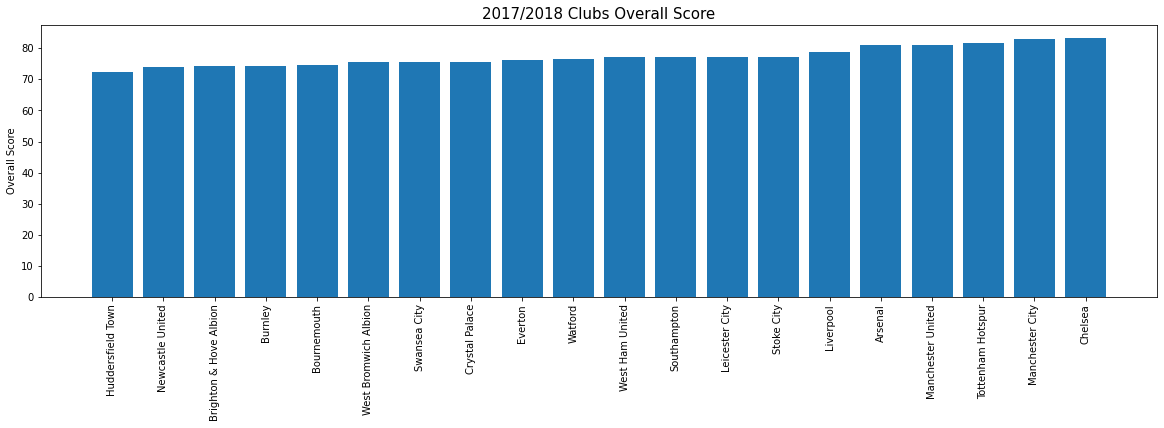

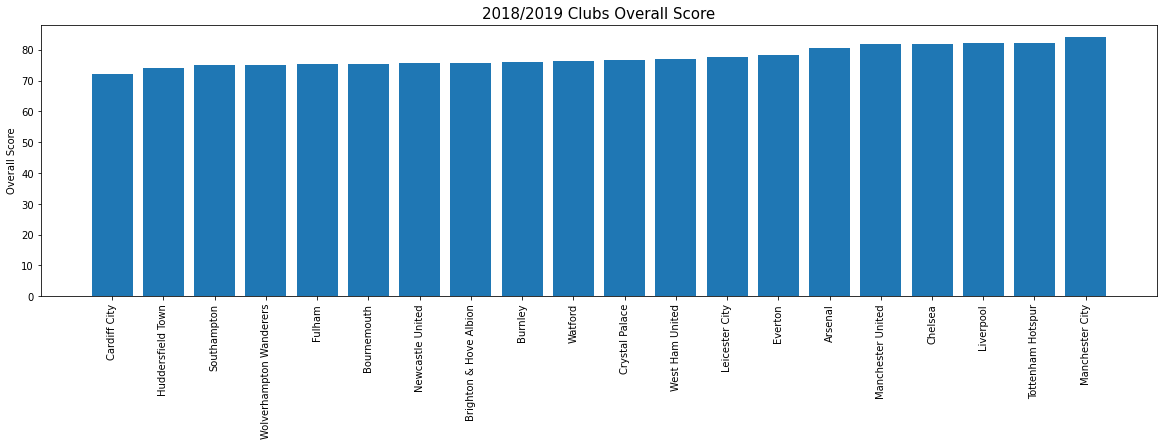

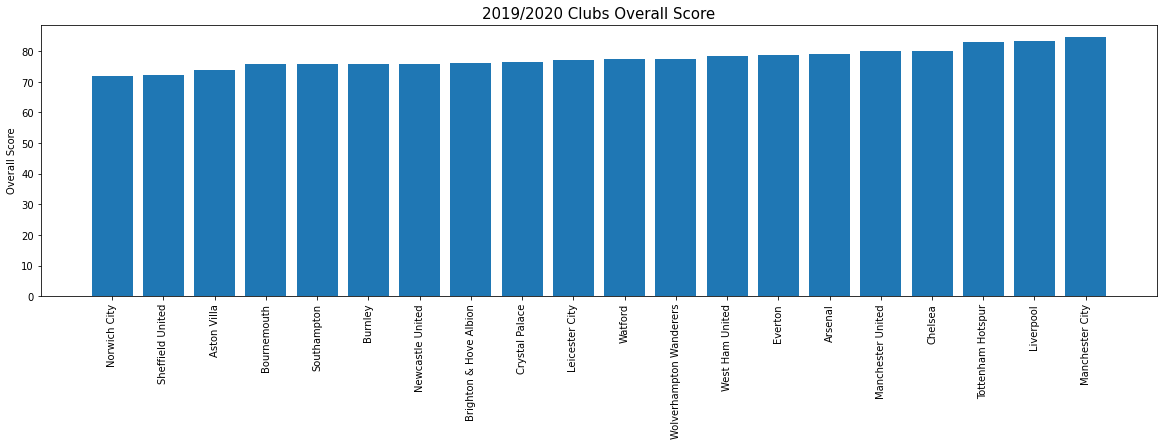

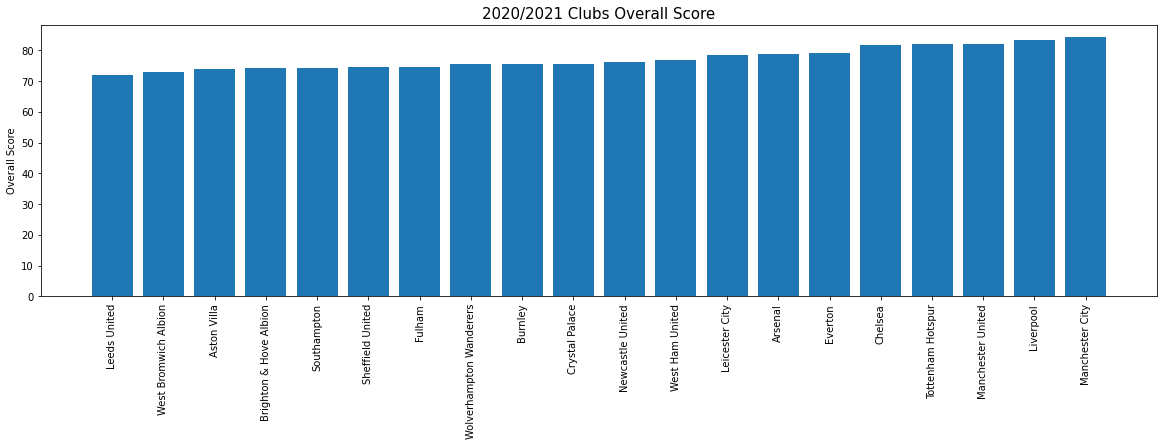

In [79]:
#overall stats 2017/2018
ova_teamstats = teamstats_2018.sort_values('average_overall')
plt.figure(figsize=(20,5))
plt.bar(data = ova_teamstats,x = 'club',height='average_overall')
plt.ylabel('Overall Score',size=10)
plt.title('2017/2018 Clubs Overall Score',size=15)
plt.xticks(rotation=90)

#overall stats
ova_teamstats = teamstats_2019.sort_values('average_overall')
plt.figure(figsize=(20,5))
plt.bar(data = ova_teamstats,x = 'club',height='average_overall')
plt.ylabel('Overall Score',size=10)
plt.title('2018/2019 Clubs Overall Score',size=15)
plt.xticks(rotation=90)

ova_teamstats = teamstats_2020.sort_values('average_overall')
plt.figure(figsize=(20,5))
plt.bar(data = ova_teamstats,x = 'club',height='average_overall')
plt.ylabel('Overall Score',size=10)
plt.title('2019/2020 Clubs Overall Score',size=15)
plt.xticks(rotation=90)

ova_teamstats = teamstats_2021.sort_values('average_overall')
plt.figure(figsize=(20,5))
plt.bar(data = ova_teamstats,x = 'club',height='average_overall')
plt.ylabel('Overall Score',size=10)
plt.title('2020/2021 Clubs Overall Score',size=15)
plt.xticks(rotation=90)

#overall stats

Over the years, Manchester City is always in the top three of the clubs' overall score. Liverpool appears three times in a row since 2018/2019. Both of them are champions for the past three season. Liverpool in 2019/2020, whereas Manchester City in 2017/2018 and 2018/2019.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

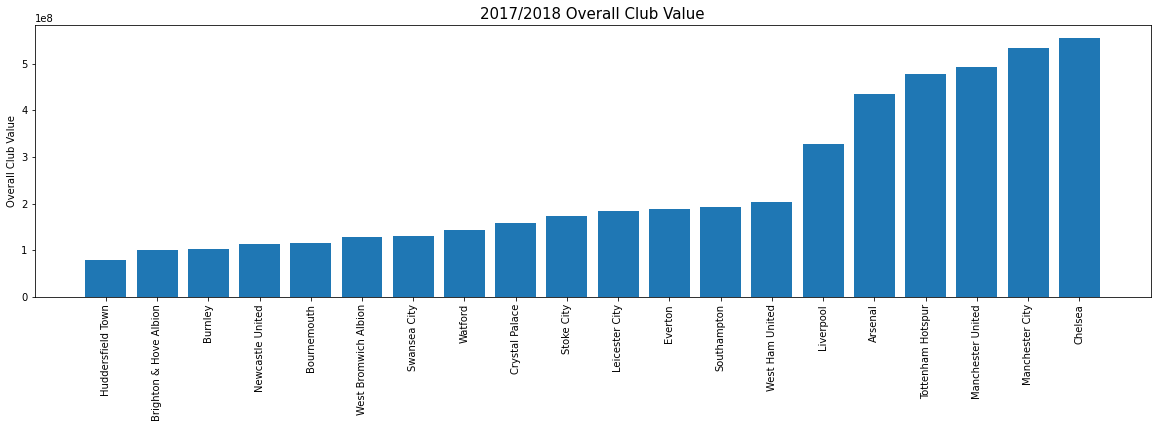

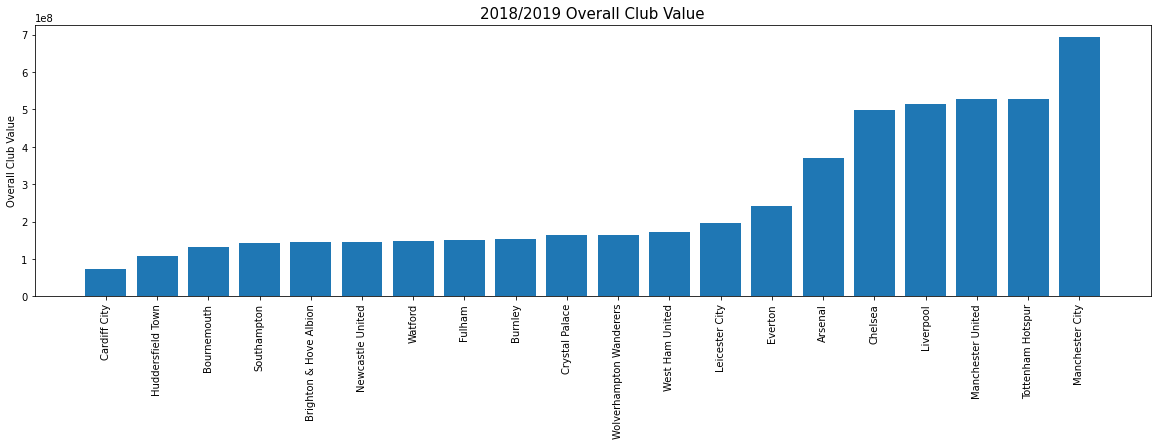

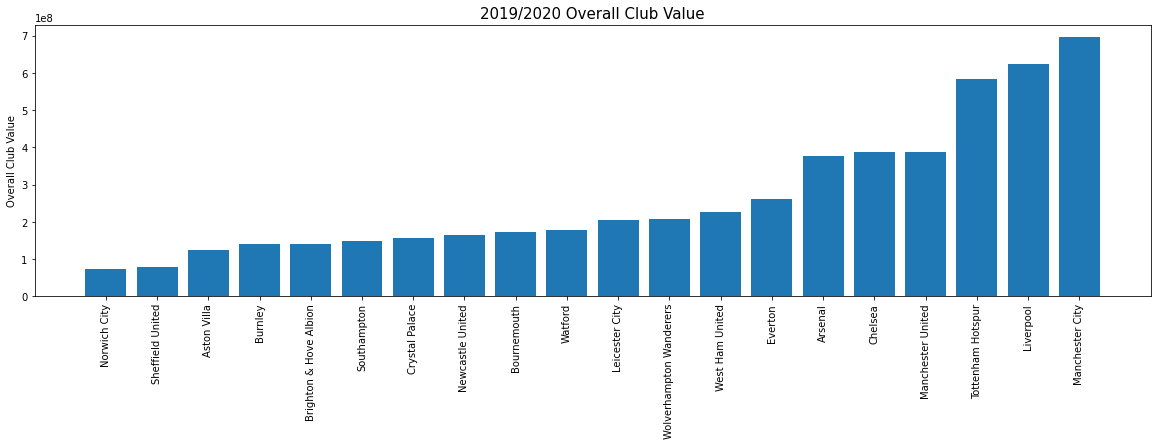

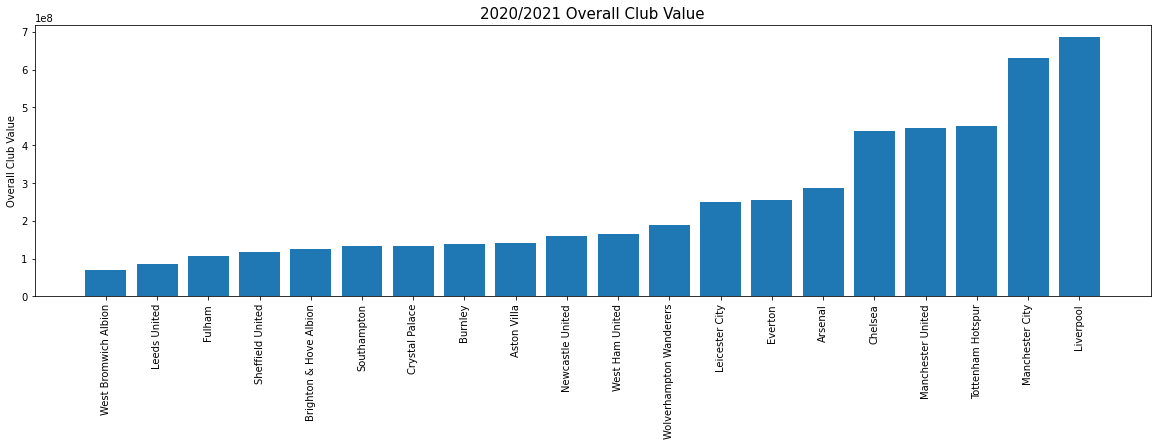

In [80]:
#overall stats 2017/2018
ova_teamstats = teamstats_2018.sort_values('total_value_eur')
plt.figure(figsize=(20,5))
plt.bar(data = ova_teamstats,x = 'club',height='total_value_eur')
plt.ylabel('Overall Club Value',size=10)
plt.title('2017/2018 Overall Club Value',size=15)
plt.xticks(rotation=90)

#overall stats
ova_teamstats = teamstats_2019.sort_values('total_value_eur')
plt.figure(figsize=(20,5))
plt.bar(data = ova_teamstats,x = 'club',height='total_value_eur')
plt.ylabel('Overall Club Value',size=10)
plt.title('2018/2019 Overall Club Value',size=15)
plt.xticks(rotation=90)

ova_teamstats = teamstats_2020.sort_values('total_value_eur')
plt.figure(figsize=(20,5))
plt.bar(data = ova_teamstats,x = 'club',height='total_value_eur')
plt.ylabel('Overall Club Value',size=10)
plt.title('2019/2020 Overall Club Value',size=15)
plt.xticks(rotation=90)

ova_teamstats = teamstats_2021.sort_values('total_value_eur')
plt.figure(figsize=(20,5))
plt.bar(data = ova_teamstats,x = 'club',height='total_value_eur')
plt.ylabel('Overall Club Value',size=10)
plt.title('2020/2021 Overall Club Value',size=15)
plt.xticks(rotation=90)

#overall stats

In terms of value, Manchester City is also one of the top few that always appear. Club value is quite related to overall score as a strong player tend to be higher in value. It works the same for wages. 

### Correlation Between the Team Stats

In this section, we will look at the correlation of every stats in a heatmap

Text(0.5, 1.0, 'CORRELATION BETWEEN TEAM STATISTICS 2020/2021')

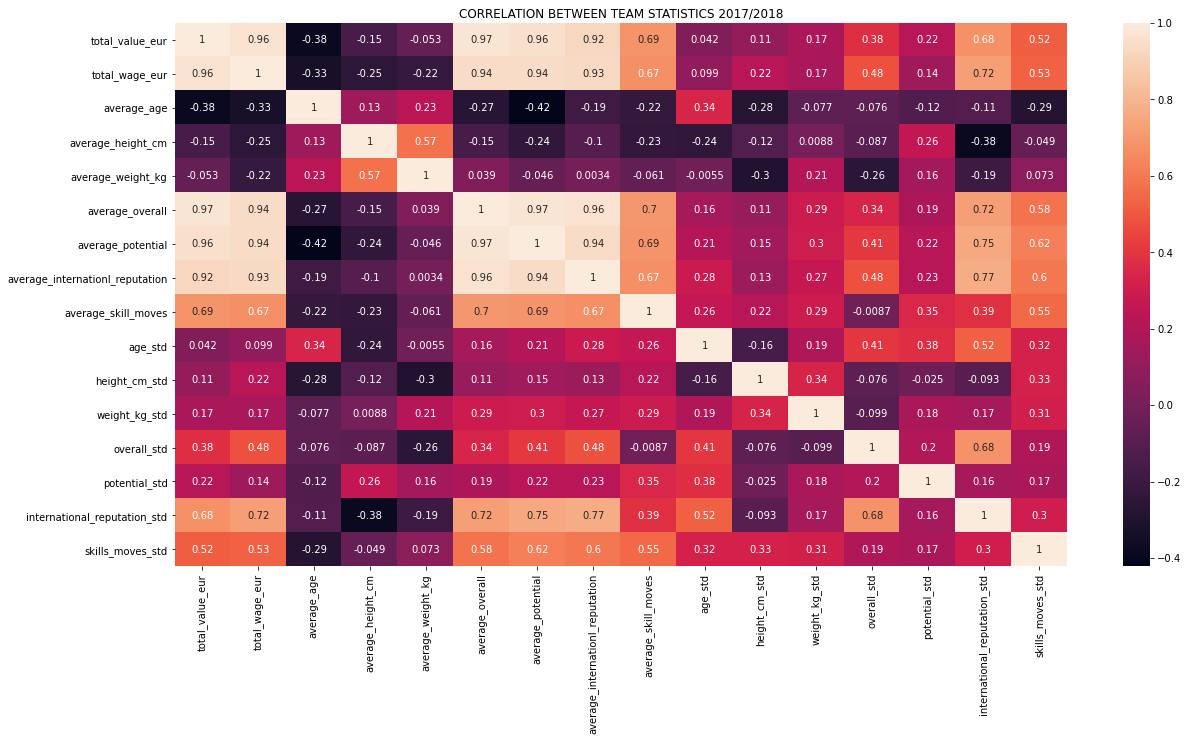

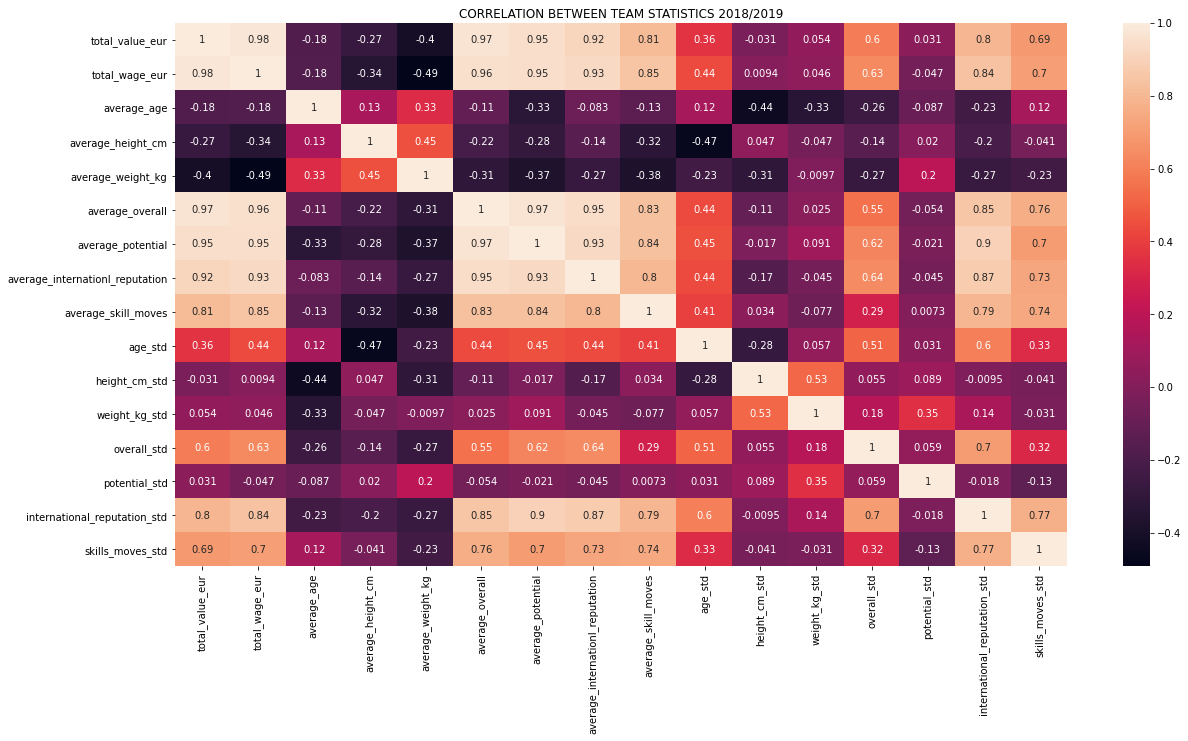

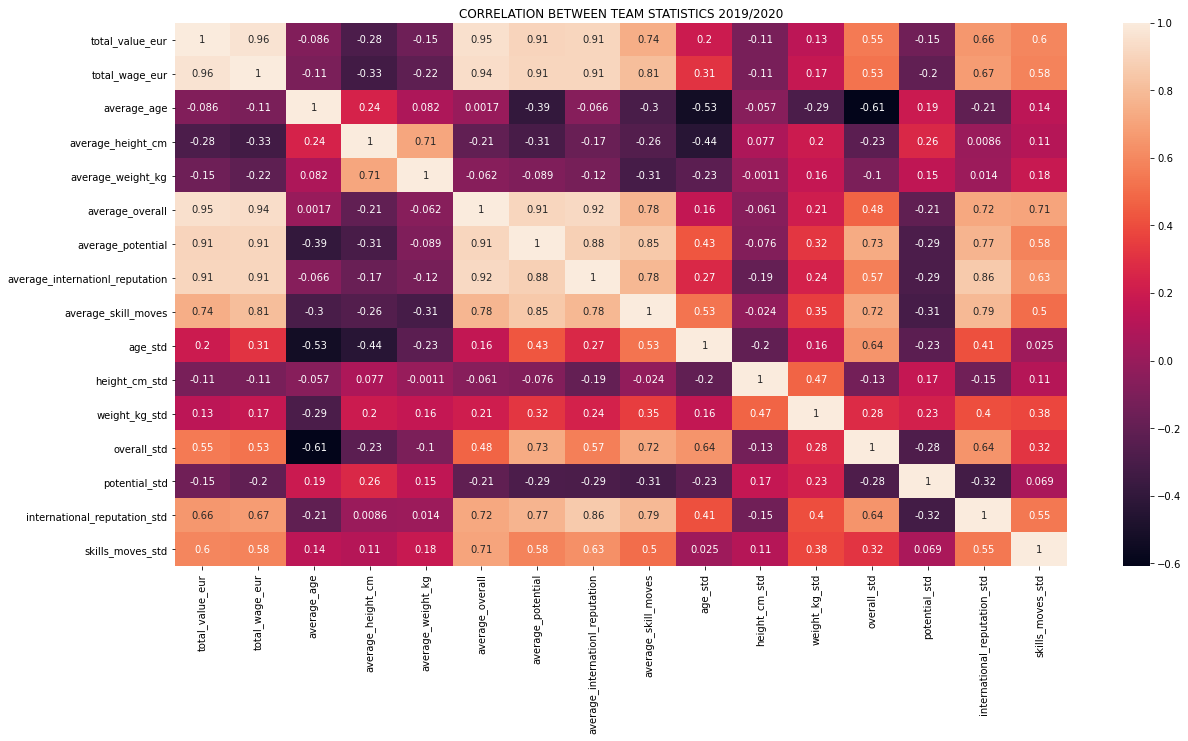

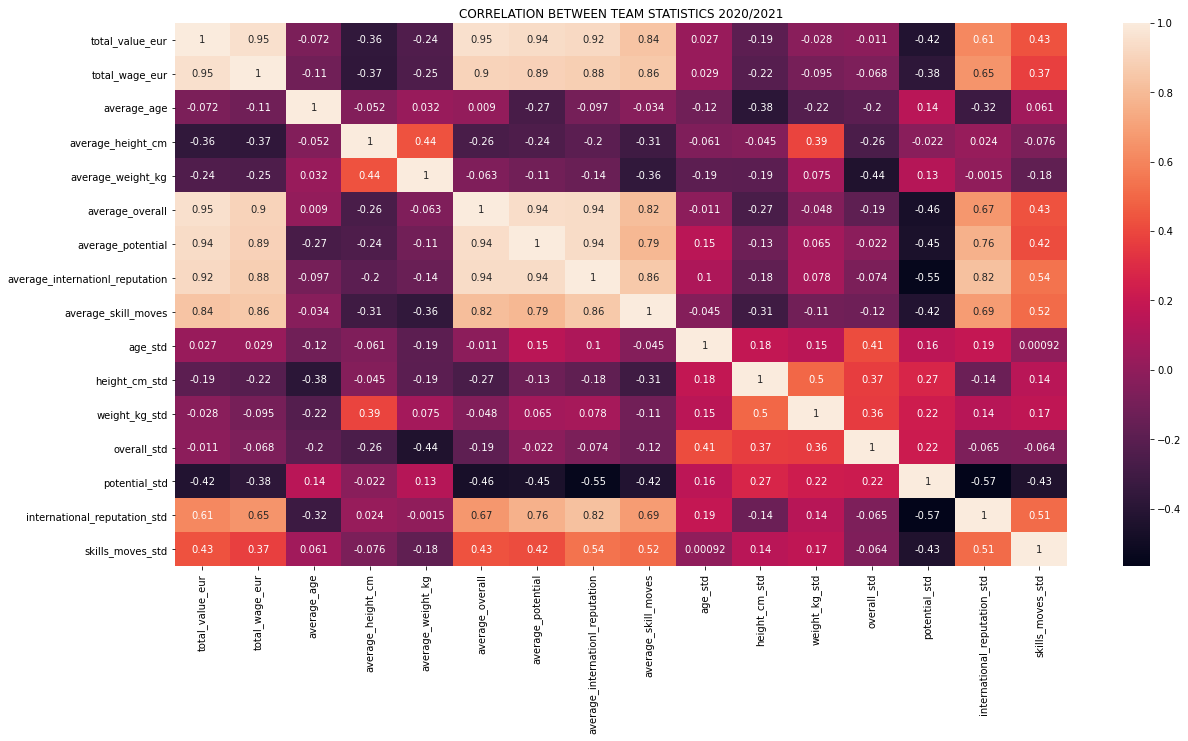

In [81]:
plt.figure(figsize=(20,10))
sns.heatmap(teamstats_2018.corr(),annot=True)
plt.title('CORRELATION BETWEEN TEAM STATISTICS 2017/2018')

plt.figure(figsize=(20,10))
sns.heatmap(teamstats_2019.corr(),annot=True)
plt.title('CORRELATION BETWEEN TEAM STATISTICS 2018/2019')

plt.figure(figsize=(20,10))
sns.heatmap(teamstats_2020.corr(),annot=True)
plt.title('CORRELATION BETWEEN TEAM STATISTICS 2019/2020')

plt.figure(figsize=(20,10))
sns.heatmap(teamstats_2021.corr(),annot=True)
plt.title('CORRELATION BETWEEN TEAM STATISTICS 2020/2021')

Based on the heatmaps above, there are very obvious negative correlation between age, height and weight, and other stats. This can be due to like heavier weight can cause players to less perform. Age can also cause low performances as usually footballers retire after age of 35. Height can be a disadvantage as well.

### Additional Study: FIFA 21 

In this section, we will perform additional study into FIFA 21 dataset. FIFA 21 is the latest FIFA football game published by Electronic Arts. It has been one of the popular football game, rivaling Pro Evolution Soccer over the years.

#### Cristiano Ronaldo VS Lionel Messi

Let's explore the greatest rivalry between two top players in the world. We are interested to find out the top two players in the world stats over the seasons. As both of them are getting to footballers retirement age, it might be the last few years which we will see them play.

In [82]:
fifa21.head(2)

short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   

   height_cm  weight_kg nationality     club_name             league_name  \
0        170         72   Argentina  FC Barcelona  Spain Primera Division   
1        187         83    Portugal      Juventus         Italian Serie A   

   league_rank  overall  potential  value_eur  wage_eur player_positions  \
0          1.0       93         93   67500000    560000       RW, ST, CF   
1          1.0       92         92   46000000    220000           ST, LW   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
0           Left                         5          4            4   
1          Right                         5          4            5   

    work_rate  team_jersey_number  pace  shooting  passing  dribbling  \
0  Medium/Low                10.0  85.0      92.0     91.0       95.0   
1    High/Low                 7.0  89.0      93.0     81.0       89.0   

   defending  physic  gk_speed  attacking_crossing  attacking_finishing  \
0       38.0    65.0       NaN                  85                   95   
1       35.0    77.0       NaN                  84                   95   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       91                 88   
1                          90                       82                 86   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               96           93                 94                  91   
1               88           81                 76                  77   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     80   
1                  92                     87                     91   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                91                  94                95                86   
1                87                  95                71                94   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             68             72              69                94   
1             95             84              78                93   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    44                       40                     93   
1                    63                       29                     95   

   mentality_vision  mentality_penalties  mentality_composure  \
0                95                   75                   96   
1                82                   84                   95   

   defending_marking  defending_standing_tackle  defending_sliding_tackle  \
0                NaN                         35                        24   
1                NaN                         32                        24   

   goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                   6                    11                   15   
1                   7                    11                   15   

   goalkeeping_positioning  goalkeeping_reflexes  
0                       14                     8  
1                       14                    11

In [83]:
ronaldo_messi = fifa21.head(2)
data = ronaldo_messi[['short_name','overall','pace','shooting','passing','dribbling','defending','physic']]


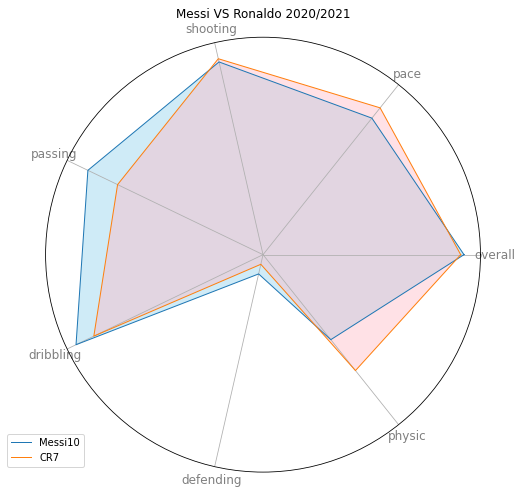

In [84]:
#Creating a radar chart to see the players stats
categories = list(data)[1:]
values = data.mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)
# part 1
val_c1 = data.iloc[0].drop('short_name').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Messi10')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)
 
# part 2
val_c2=data.iloc[1].drop('short_name').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='CR7')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Messi VS Ronaldo 2020/2021')
plt.show()

It seems that out of seven stats, Messi is better than Ronaldo at 4 stats. If that is the case, Messi is the better player in FIFA 21. I guess age might have caught up with Ronaldo, he is 35 this year. Usually footballer retire around this age. However, we have case of a top player playing at age 38.

#### Oldest Players in the Top Leagues

In [85]:
fifa21.loc[fifa21['league_name'].isin(['Italian Serie A','Spain Primera Divison','English Premier League','German 1. Bundesliga','French Ligue 1'])].sort_values(by='age',ascending=False,ignore_index=False).head(10)

short_name                               long_name  age  \
1026           Hilton                Vitorino Hilton da Silva   42   
239         G. Buffon                        Gianluigi Buffon   42   
13666         P. Gori                      Pier Graziano Gori   40   
4966        G. Pegolo                         Gianluca Pegolo   39   
3421      Bruno Alves              Bruno Eduardo Regufe Alves   38   
168    Z. Ibrahimović                      Zlatan Ibrahimović   38   
1772     W. Caballero               Wilfredo Daniel Caballero   38   
1782       R. Palacio               Rodrigo Sebastián Palacio   38   
2753           Rafael  Rafael de Andrade Bittencourt Pinheiro   38   
2263        C. Maggio                        Christian Maggio   38   

              dob  height_cm  weight_kg nationality        club_name  \
1026   1977-09-13        180         78      Brazil  Montpellier HSC   
239    1978-01-28        192         92       Italy         Juventus   
13666  1980-05-10        189         83       Italy        Benevento   
4966   1981-03-25        183         76       Italy         Sassuolo   
3421   1981-11-27        189         83    Portugal            Parma   
168    1981-10-03        195         95      Sweden            Milan   
1772   1981-09-28        186         83   Argentina          Chelsea   
1782   1982-02-05        176         70   Argentina          Bologna   
2753   1982-03-03        187         80      Brazil           Spezia   
2263   1982-02-11        184         79       Italy        Benevento   

                  league_name  league_rank  overall  potential  value_eur  \
1026           French Ligue 1          1.0       77         77          0   
239           Italian Serie A          1.0       82         82    2200000   
13666         Italian Serie A          1.0       62         62      30000   
4966          Italian Serie A          1.0       70         70     180000   
3421          Italian Serie A          1.0       72         72     625000   
168           Italian Serie A          1.0       83         83    9500000   
1772   English Premier League          1.0       75         75     675000   
1782          Italian Serie A          1.0       75         75    2400000   
2753          Italian Serie A          1.0       73         73     400000   
2263          Italian Serie A          1.0       74         74    1000000   

       wage_eur player_positions preferred_foot  international_reputation  \
1026      20000               CB          Right                         2   
239       41000               GK          Right                         4   
13666      1000               GK          Right                         1   
4966       7000               GK           Left                         1   
3421      14000               CB          Right                         2   
168       49000               ST          Right                         5   
1772      32000               GK          Right                         2   
1782      24000          ST, CAM          Right                         2   
2753      15000               GK          Right                         2   
2263      11000               RB          Right                         2   

       weak_foot  skill_moves      work_rate  team_jersey_number  pace  \
1026           4            3  Medium/Medium                 4.0  33.0   
239            2            1  Medium/Medium                77.0   NaN   
13666          1            1  Medium/Medium                22.0   NaN   
4966           2            1  Medium/Medium                56.0   NaN   
3421           3            3  Medium/Medium                22.0  35.0   
168            4            5     Medium/Low                11.0  52.0   
1772           3            1  Medium/Medium                13.0   NaN   
1782           3            4      High/High                24.0  72.0   
2753           3            1  Medium/Medium                22.0   NaN   
2263       

The above is the dataset sort by age and players who are playing in the top 5 leagues,namely English Premier League, Italian Serie A, Spanish Primera Division, German Bundesliga 1 and French Ligue 1. You can see the oldest player is age 42. He is playing as a Centre Back. However, the top player that was mentioned is index 168, Zlatan Ibrahimovic. He is a top striker playing at Milan and he is 38 currently. Age might catch up, but players who are motivated to play, will make a difference.